In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import svm
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.decomposition import PCA
from numpy.linalg import eig
from sklearn.pipeline import Pipeline

In [2]:
cust_df = pd.read_csv('C:\\Users\\user\\Documents\\IOD_data_MAIN\\DATA\\Project 2 Data\\olist_customers_dataset.csv')
geolocation_df = pd.read_csv('C:\\Users\\user\\Documents\\IOD_data_MAIN\\DATA\\Project 2 Data\\olist_geolocation_dataset.csv')
order_item_df = pd.read_csv('C:\\Users\\user\\Documents\\IOD_data_MAIN\\DATA\\Project 2 Data\\olist_order_items_dataset.csv')
payment_df = pd.read_csv('C:\\Users\\user\\Documents\\IOD_data_MAIN\\DATA\\Project 2 Data\\olist_order_payments_dataset.csv')
order_df = pd.read_csv('C:\\Users\\user\\Documents\\IOD_data_MAIN\\DATA\\Project 2 Data\\olist_orders_dataset.csv')
products_df = pd.read_csv('C:\\Users\\user\\Documents\\IOD_data_MAIN\\DATA\\Project 2 Data\\olist_products_dataset.csv')
sellers_df = pd.read_csv('C:\\Users\\user\\Documents\\IOD_data_MAIN\\DATA\\Project 2 Data\\olist_sellers_dataset.csv')
review_df = pd.read_csv('C:\\Users\\user\\Documents\\IOD_data_MAIN\\DATA\\Project 2 Data\\olist_order_reviews_dataset.csv')



# Cust_df 

In [3]:
cust_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [5]:
cust_df.isnull().sum()
#Customer data got no null value 

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [6]:
cust_df.duplicated().sum()


0

In [7]:
cust_df.duplicated(['customer_unique_id']).sum()
#Repeated buyer 

3345

In [8]:
cust_df.duplicated('customer_id').sum()

0

Customer_id is given to customer once they made their purchase. this is to track their purchases information. Whether product is delivered or not, review of the products, cancellation of the purchase or many more. 

# Customer purchase questions
i want to check is there repeated customer that buy from the website. once we merge the file we need to check the following question;
1- repeated customer is satify with our service check base on rating, deliver on time? 
2- repeated customer buying habit. they buy during festival season? discounted item?



In [9]:
top_cust = cust_df.groupby("customer_unique_id")[["customer_unique_id"]].count()
print(top_cust)

top_cust.rename(columns={'customer_unique_id': 'Number_of_Purchases'}, inplace=True)
top_cust.head()

                                  customer_unique_id
customer_unique_id                                  
0000366f3b9a7992bf8c76cfdf3221e2                   1
0000b849f77a49e4a4ce2b2a4ca5be3f                   1
0000f46a3911fa3c0805444483337064                   1
0000f6ccb0745a6a4b88665a16c9f078                   1
0004aac84e0df4da2b147fca70cf8255                   1
...                                              ...
fffcf5a5ff07b0908bd4e2dbc735a684                   1
fffea47cd6d3cc0a88bd621562a9d061                   1
ffff371b4d645b6ecea244b27531430a                   1
ffff5962728ec6157033ef9805bacc48                   1
ffffd2657e2aad2907e67c3e9daecbeb                   1

[96096 rows x 1 columns]


,Number_of_Purchases
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,1
0000b849f77a49e4a4ce2b2a4ca5be3f,1
0000f46a3911fa3c0805444483337064,1
0000f6ccb0745a6a4b88665a16c9f078,1
0004aac84e0df4da2b147fca70cf8255,1


Repeated buyer, we can do an analysis on repeated buyer behaviour and implement it on other buyer 

In [10]:
top_cust_sort = top_cust.sort_values(by='Number_of_Purchases',ascending=False)
top_cust_sort[:10] 

,Number_of_Purchases
customer_unique_id,
8d50f5eadf50201ccdcedfb9e2ac8455,17
3e43e6105506432c953e165fb2acf44c,9
6469f99c1f9dfae7733b25662e7f1782,7
ca77025e7201e3b30c44b472ff346268,7
1b6c7548a2a1f9037c1fd3ddfed95f33,7
12f5d6e1cbf93dafd9dcc19095df0b3d,6
de34b16117594161a6a89c50b289d35a,6
63cfc61cee11cbe306bff5857d00bfe4,6
f0e310a6839dce9de1638e0fe5ab282a,6


In [11]:
top_cust_sort

,Number_of_Purchases
customer_unique_id,
8d50f5eadf50201ccdcedfb9e2ac8455,17
3e43e6105506432c953e165fb2acf44c,9
6469f99c1f9dfae7733b25662e7f1782,7
ca77025e7201e3b30c44b472ff346268,7
1b6c7548a2a1f9037c1fd3ddfed95f33,7
...,...
5657dfebff5868c4dc7e8355fea865c4,1
5657596addb4d7b07b32cd330614bdf8,1
5656eb169546146caeab56c3ffc3d268,1


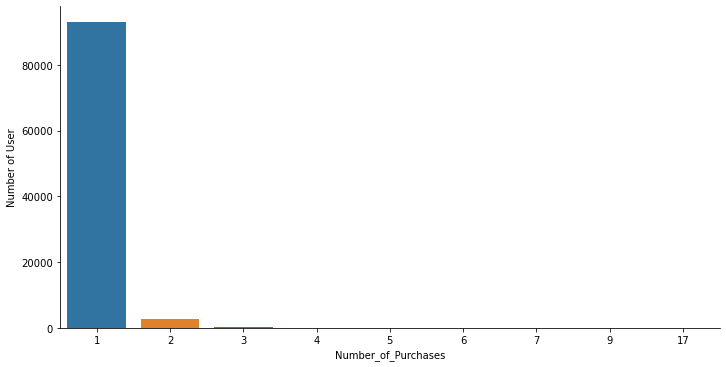

In [12]:
j = sns.catplot(x="Number_of_Purchases", data=top_cust,aspect=2, kind="count")
j.set_ylabels("Number of User")
j.set_xticklabels(step=1)

In [13]:
#struck at this need to redo
buyer_1 = top_cust_sort[top_cust_sort['Number_of_Purchases']==1].count()
buyer_2 = top_cust_sort[top_cust_sort['Number_of_Purchases']==2].count()
buyer_3 = top_cust_sort[top_cust_sort['Number_of_Purchases']==3].count()
buyer_4 = top_cust_sort[top_cust_sort['Number_of_Purchases']==4].count()
buyer_5 = top_cust_sort[top_cust_sort['Number_of_Purchases']==5].count()
buyer_6 = top_cust_sort[top_cust_sort['Number_of_Purchases']==6].count()
buyer_7 = top_cust_sort[top_cust_sort['Number_of_Purchases']==7].count()
buyer_9 = top_cust_sort[top_cust_sort['Number_of_Purchases']==9].count()
buyer_17 = top_cust_sort[top_cust_sort['Number_of_Purchases']==17].count()

print("Check the frequency of the purchases")
print("Customers that purchase item from the website 1 time: %d" %buyer_1)
print("Customers that purchase item from the website 2 times: %d" %buyer_2)
print("Customers that purchase item from the website 3 times: %d" %buyer_3)
print("Customers that purchase item from the website 4 times: %d" %buyer_4)
print("Customers that purchase item from the website 5 times: %d" %buyer_5)
print("Customers that purchase item from the website 6 times: %d" %buyer_6)
print("Customers that purchase item from the website 7 times: %d" %buyer_7)
print("Customers that purchase item from the website 9 times: %d" %buyer_9)
print("Customers that purchase item from the website 17 times: %d" %buyer_17)


Check the frequency of the purchases
Customers that purchase item from the website 1 time: 93099
Customers that purchase item from the website 2 times: 2745
Customers that purchase item from the website 3 times: 203
Customers that purchase item from the website 4 times: 30
Customers that purchase item from the website 5 times: 8
Customers that purchase item from the website 6 times: 6
Customers that purchase item from the website 7 times: 3
Customers that purchase item from the website 9 times: 1
Customers that purchase item from the website 17 times: 1


In [14]:
top_cust_sort["Number_of_Purchases"].value_counts()

1     93099
2      2745
3       203
4        30
5         8
6         6
7         3
9         1
17        1
Name: Number_of_Purchases, dtype: int64

In [15]:
#why customers will purchase so many times and how i can push for me customer to purchase online 

In [16]:
cust_df['customer_city'].nunique()

4119

In [17]:
cust_df_city = cust_df.groupby('customer_city').agg(Num_of_Sales = ('customer_city', 'size'))

In [18]:
cust_df_city

,Num_of_Sales
customer_city,
abadia dos dourados,3
abadiania,1
abaete,12
abaetetuba,11
abaiara,2
...,...
xinguara,9
xique-xique,3
zacarias,2


In [19]:
top_city = cust_df_city.sort_values(by='Num_of_Sales',ascending=False)

In [20]:
top_city[:50]

,Num_of_Sales
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
campinas,1444
porto alegre,1379
salvador,1245
guarulhos,1189


# Plot the customer city graph 
X axis is Customer_city 
Y_axis is the num of sales 

# Gelocation dataframe

In [21]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [22]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [23]:
geolocation_df.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [24]:
geolocation_df.duplicated().sum()
# It should be buyer getting products from the same area 
# when merge the file together we can plot the graph

261831

In [25]:
geolocation_df['geolocation_zip_code_prefix'].nunique()

19015

In [26]:
cust_df['customer_zip_code_prefix'].nunique()

14994

To continue, check how to use the geolocation_lat and geolocation_lng to find out the distance between seller and buyer 

# Order_item_df 

In [27]:
order_item_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [28]:
order_item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [29]:
order_item_df.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [30]:
order_item_df.duplicated().sum()

0

In [31]:
order_item_df.duplicated(['seller_id']).sum()

109555

In [32]:
# simply code 
order_item_df_sellerid = order_item_df.groupby('seller_id').size().sort_values(ascending=False)

In [33]:
order_item_df_sellerid

seller_id
6560211a19b47992c3666cc44a7e94c0    2033
4a3ca9315b744ce9f8e9374361493884    1987
1f50f920176fa81dab994f9023523100    1931
cc419e0650a3c5ba77189a1882b7556a    1775
da8622b14eb17ae2831f4ac5b9dab84a    1551
                                    ... 
5f57db27027655e6c6a391601daa0258       1
5e25c632f9db6cfb8bc100421c2737b6       1
5e106d93b717c2682b9383da480364a1       1
d36b07fd3c5088e477a72d1fccfe29d4       1
7d81e74a4755b552267cd5e081563028       1
Length: 3095, dtype: int64

In [34]:
order_item_df_sellerid.describe()

count    3095.000000
mean       36.397415
std       119.193461
min         1.000000
25%         2.000000
50%         8.000000
75%        24.000000
max      2033.000000
dtype: float64

In [35]:
order_item_df.groupby('seller_id').agg(Num_of_Sales = ('seller_id', 'size'), Total_sales = ('price', 'sum'), freight_total_value = ('freight_value','sum') )


,Num_of_Sales,Total_sales,freight_total_value
seller_id,,,
0015a82c2db000af6aaaf3ae2ecb0532,3,2685.00,63.06
001cca7ae9ae17fb1caed9dfb1094831,239,25080.03,8854.14
001e6ad469a905060d959994f1b41e4f,1,250.00,17.94
002100f778ceb8431b7a1020ff7ab48f,55,1234.50,793.66
003554e2dce176b5555353e4f3555ac8,1,120.00,19.38
...,...,...,...
ffcfefa19b08742c5d315f2791395ee5,1,69.90,9.62
ffdd9f82b9a447f6f8d4b91554cc7dd3,20,2101.20,727.46
ffeee66ac5d5a62fe688b9d26f83f534,14,1839.86,419.69


In [36]:
sellerid_df = order_item_df.groupby('seller_id').agg(Num_of_Sales = ('seller_id', 'size'))

In [37]:
sellerid_df.sort_values(by='Num_of_Sales',ascending=False)

,Num_of_Sales
seller_id,
6560211a19b47992c3666cc44a7e94c0,2033
4a3ca9315b744ce9f8e9374361493884,1987
1f50f920176fa81dab994f9023523100,1931
cc419e0650a3c5ba77189a1882b7556a,1775
da8622b14eb17ae2831f4ac5b9dab84a,1551
...,...
5f57db27027655e6c6a391601daa0258,1
5e25c632f9db6cfb8bc100421c2737b6,1
5e106d93b717c2682b9383da480364a1,1


# Sort seller Id with their number of sales 

In [38]:
group_seller_id = sellerid_df.groupby('Num_of_Sales').agg(Num_of_Seller_id = ('Num_of_Sales', 'size'))

In [39]:
group_seller_id

,Num_of_Seller_id
Num_of_Sales,
1,509
2,328
3,212
4,152
5,142
...,...
1551,1
1775,1
1931,1


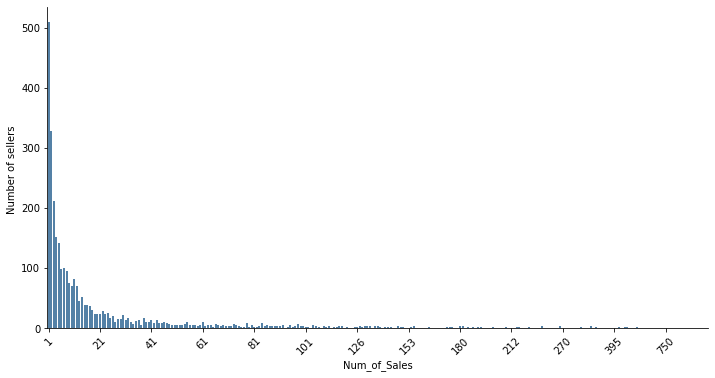

In [40]:
sellergraph = sns.catplot(x="Num_of_Sales", data=sellerid_df, aspect=2, kind="count", color='steelblue')
sellergraph.set_ylabels("Number of sellers ")
sellergraph.set_xticklabels(step=20, rotation=45)

In [41]:
order_item_df_sellerid.nunique()

257

In [42]:
order_item_df_sellerid.unique()

array([2033, 1987, 1931, 1775, 1551, 1499, 1428, 1364, 1203, 1171, 1156,
       1147, 1018,  830,  798,  770,  750,  724,  631,  613,  586,  578,
        560,  558,  542,  536,  529,  522,  454,  435,  431,  430,  429,
        427,  410,  405,  395,  389,  379,  373,  365,  363,  361,  346,
        343,  340,  339,  338,  331,  328,  327,  326,  307,  306,  302,
        281,  270,  269,  268,  263,  259,  255,  249,  246,  240,  239,
        234,  231,  230,  228,  225,  222,  221,  220,  219,  216,  212,
        211,  210,  209,  207,  206,  204,  202,  200,  196,  195,  194,
        193,  192,  188,  187,  186,  184,  183,  181,  180,  178,  176,
        175,  174,  173,  172,  171,  170,  169,  168,  167,  165,  164,
        162,  160,  159,  157,  156,  155,  153,  151,  149,  148,  146,
        145,  144,  143,  142,  140,  139,  138,  137,  135,  133,  132,
        131,  130,  129,  128,  126,  125,  123,  122,  121,  119,  118,
        117,  115,  114,  113,  112,  111,  110,  1

# order_item_df [seller_id]
observe that top sellers are getting customers to purchase from them. 
there are 509 seller that manage to sell 1 time - do we need to remove these sellers? are they inactive 
Check the above cells for the no. times a sseller have done over the years. 
Question to ask, 
Why there are seller who only made 100times sales and below? 
How seller made more than 100 sales? 


When merge file together, check out the products thats sell wells with the 

Order id might have more than 1 products 

In [43]:
order_item_df.groupby('order_id').size().sort_values(ascending=False)

order_id
8272b63d03f5f79c56e9e4120aec44ef    21
1b15974a0141d54e36626dca3fdc731a    20
ab14fdcfbe524636d65ee38360e22ce8    20
9ef13efd6949e4573a18964dd1bbe7f5    15
428a2f660dc84138d969ccd69a0ab6d5    15
                                    ..
5a0911d70c1f85d3bed0df1bf693a6dd     1
5a082b558a3798d3e36d93bfa8ca1eae     1
5a07264682e0b8fbb3f166edbbffc6e8     1
5a071192a28951b76774e5a760c8c9b7     1
fffe41c64501cc87c801fd61db3f6244     1
Length: 98666, dtype: int64

# Payment_df 

In [44]:
payment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [45]:
payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [46]:
payment_df.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [47]:
payment_df.duplicated().sum()

0

In [48]:
payment_df['payment_sequential'].nunique()

29

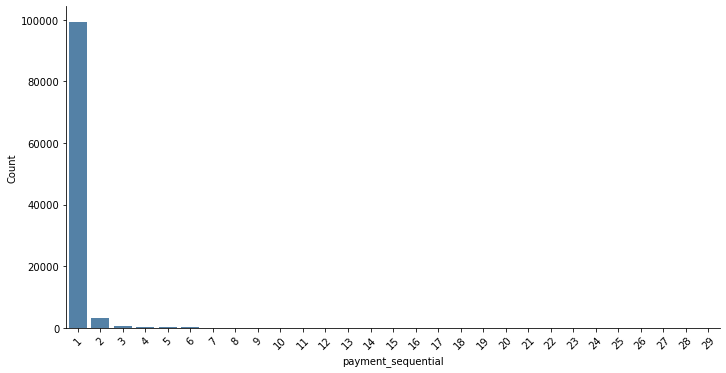

In [49]:
ps = sns.catplot(x="payment_sequential", data=payment_df,aspect=2, kind="count", color='steelblue', )
ps.set_ylabels("Count")
ps.set_xticklabels(step=1, rotation=45)

In [50]:
payment_df['payment_type'].nunique()

5

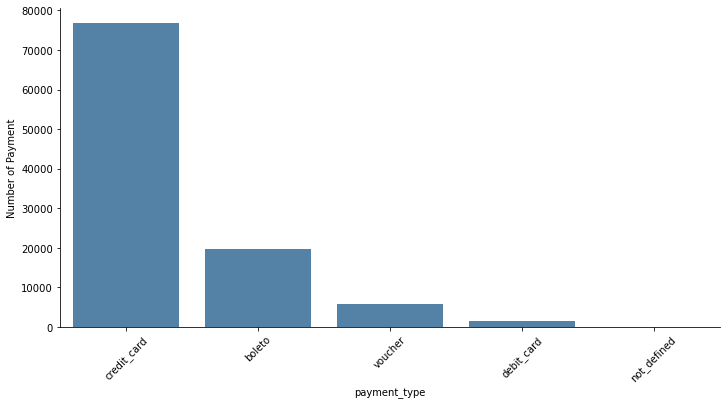

In [51]:
p = sns.catplot(x="payment_type", data=payment_df,aspect=2, kind="count", color='steelblue', )
p.set_ylabels("Number of Payment")
p.set_xticklabels(step=1, rotation=45)

boleto is ticket 

In [52]:
#payment_type_df.sort_values(by='Number_of_Purchases',ascending=False)

# Order_df 
- check the conclusion to do list needed to be done after merging the files 

In [53]:
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [54]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [55]:
order_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965

All these have to check and add on more code to run 

In [56]:
#Check order_approved_at whether is it delivered or customer never purchase


order_df_NaN = order_df.isnull()
order_row_has_NaN = order_df_NaN.any(axis = 1)
order_rows_with_NaN = order_df[order_row_has_NaN]
order_rows_with_NaN

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


# Conclusion for the missing data
order_approved_at that is nan are orders status that is canceled by customer. we can drop the rows
order_delivered_carrier_date is NaN are orders status that is invoiced or process but is not shipped 
    - There are items that is due long ago. need to merge file to check what is the problem 
order_delivered_customer_date is NaN are orders status that is Shipped and customer did not receive 
    - There are items shipped out in 2017 but customers did not recieve the item. need to check. 

In [57]:
order_df.duplicated().sum()

0

# products_df 

In [58]:

products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [59]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [60]:
products_df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [61]:
products_df_NaN = products_df.isnull()
products_row_has_NaN = products_df_NaN.any(axis = 1)
products_rows_with_NaN =products_df[products_row_has_NaN]
products_rows_with_NaN

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [62]:
products_df.duplicated().sum()

0

# Conclusion for products_df for missing data 
611 products is without product cateogory, name_length, Description_length and product_photo. There are 2 rows with all columns are empty 
Check whether there is any sales of those products. If no sale mean this is empty products that sellers register but did not do any sales. 
If there are sales, it might be sellers past product which does not exist now then we need to filter out. 

# Seller_df

In [63]:

sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [64]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [65]:
sellers_df.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [66]:
sellers_df.duplicated().sum()

0

# Review_df

In [67]:

review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [68]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [69]:
review_df.isnull().sum()
#Alot of customer never leave review message 

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [70]:
review_df.duplicated().sum()

0

# Category_df, is to change the product name. need to do it before merging  

In [71]:
category_df = pd.read_csv('C:\\Users\\user\\Documents\\IOD_data_MAIN\\DATA\\Project 2 Data\\product_category_name_translation.csv')
category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [72]:
category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [73]:
# replace the category name 

category_df['product_category_name'].unique()

array(['beleza_saude', 'informatica_acessorios', 'automotivo',
       'cama_mesa_banho', 'moveis_decoracao', 'esporte_lazer',
       'perfumaria', 'utilidades_domesticas', 'telefonia',
       'relogios_presentes', 'alimentos_bebidas', 'bebes', 'papelaria',
       'tablets_impressao_imagem', 'brinquedos', 'telefonia_fixa',
       'ferramentas_jardim', 'fashion_bolsas_e_acessorios',
       'eletroportateis', 'consoles_games', 'audio', 'fashion_calcados',
       'cool_stuff', 'malas_acessorios', 'climatizacao',
       'construcao_ferramentas_construcao',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'construcao_ferramentas_jardim', 'fashion_roupa_masculina',
       'pet_shop', 'moveis_escritorio', 'market_place', 'eletronicos',
       'eletrodomesticos', 'artigos_de_festas', 'casa_conforto',
       'construcao_ferramentas_ferramentas', 'agro_industria_e_comercio',
       'moveis_colchao_e_estofado', 'livros_tecnicos', 'casa_construcao',
       'instrumentos_musicais', 'm

In [74]:
len(category_df['product_category_name'])

71

In [75]:
len(category_df['product_category_name_english'])

71

In [76]:
category_df['product_category_name_english'].unique()

array(['health_beauty', 'computers_accessories', 'auto', 'bed_bath_table',
       'furniture_decor', 'sports_leisure', 'perfumery', 'housewares',
       'telephony', 'watches_gifts', 'food_drink', 'baby', 'stationery',
       'tablets_printing_image', 'toys', 'fixed_telephony',
       'garden_tools', 'fashion_bags_accessories', 'small_appliances',
       'consoles_games', 'audio', 'fashion_shoes', 'cool_stuff',
       'luggage_accessories', 'air_conditioning',
       'construction_tools_construction',
       'kitchen_dining_laundry_garden_furniture',
       'costruction_tools_garden', 'fashion_male_clothing', 'pet_shop',
       'office_furniture', 'market_place', 'electronics',
       'home_appliances', 'party_supplies', 'home_confort',
       'costruction_tools_tools', 'agro_industry_and_commerce',
       'furniture_mattress_and_upholstery', 'books_technical',
       'home_construction', 'musical_instruments',
       'furniture_living_room', 'construction_tools_lights',
       'indust

In [77]:
products_df['product_category_name'] = products_df['product_category_name'].replace(['beleza_saude', 'informatica_acessorios', 'automotivo',
       'cama_mesa_banho', 'moveis_decoracao', 'esporte_lazer',
       'perfumaria', 'utilidades_domesticas', 'telefonia',
       'relogios_presentes', 'alimentos_bebidas', 'bebes', 'papelaria',
       'tablets_impressao_imagem', 'brinquedos', 'telefonia_fixa',
       'ferramentas_jardim', 'fashion_bolsas_e_acessorios',
       'eletroportateis', 'consoles_games', 'audio', 'fashion_calcados',
       'cool_stuff', 'malas_acessorios', 'climatizacao',
       'construcao_ferramentas_construcao',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'construcao_ferramentas_jardim', 'fashion_roupa_masculina',
       'pet_shop', 'moveis_escritorio', 'market_place', 'eletronicos',
       'eletrodomesticos', 'artigos_de_festas', 'casa_conforto',
       'construcao_ferramentas_ferramentas', 'agro_industria_e_comercio',
       'moveis_colchao_e_estofado', 'livros_tecnicos', 'casa_construcao',
       'instrumentos_musicais', 'moveis_sala',
       'construcao_ferramentas_iluminacao',
       'industria_comercio_e_negocios', 'alimentos', 'artes',
       'moveis_quarto', 'livros_interesse_geral',
       'construcao_ferramentas_seguranca',
       'fashion_underwear_e_moda_praia', 'fashion_esporte',
       'sinalizacao_e_seguranca', 'pcs', 'artigos_de_natal',
       'fashion_roupa_feminina', 'eletrodomesticos_2',
       'livros_importados', 'bebidas', 'cine_foto', 'la_cuisine',
       'musica', 'casa_conforto_2', 'portateis_casa_forno_e_cafe',
       'cds_dvds_musicais', 'dvds_blu_ray', 'flores',
       'artes_e_artesanato', 'fraldas_higiene',
       'fashion_roupa_infanto_juvenil', 'seguros_e_servicos'],
                                                                                    ['health_beauty', 'computers_accessories', 'auto', 'bed_bath_table',
       'furniture_decor', 'sports_leisure', 'perfumery', 'housewares',
       'telephony', 'watches_gifts', 'food_drink', 'baby', 'stationery',
       'tablets_printing_image', 'toys', 'fixed_telephony',
       'garden_tools', 'fashion_bags_accessories', 'small_appliances',
       'consoles_games', 'audio', 'fashion_shoes', 'cool_stuff',
       'luggage_accessories', 'air_conditioning',
       'construction_tools_construction',
       'kitchen_dining_laundry_garden_furniture',
       'costruction_tools_garden', 'fashion_male_clothing', 'pet_shop',
       'office_furniture', 'market_place', 'electronics',
       'home_appliances', 'party_supplies', 'home_confort',
       'costruction_tools_tools', 'agro_industry_and_commerce',
       'furniture_mattress_and_upholstery', 'books_technical',
       'home_construction', 'musical_instruments',
       'furniture_living_room', 'construction_tools_lights',
       'industry_commerce_and_business', 'food', 'art',
       'furniture_bedroom', 'books_general_interest',
       'construction_tools_safety', 'fashion_underwear_beach',
       'fashion_sport', 'signaling_and_security', 'computers',
       'christmas_supplies', 'fashio_female_clothing',
       'home_appliances_2', 'books_imported', 'drinks', 'cine_photo',
       'la_cuisine', 'music', 'home_comfort_2',
       'small_appliances_home_oven_and_coffee', 'cds_dvds_musicals',
       'dvds_blu_ray', 'flowers', 'arts_and_craftmanship',
       'diapers_and_hygiene', 'fashion_childrens_clothes',
       'security_and_services'])

In [78]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


#merge into 1 data file 

In [79]:
#merge into 1 data file 

ecommerce_df = order_item_df.merge(order_df, on='order_id', how='outer')
ecommerce_df = ecommerce_df.merge(payment_df, on='order_id', how='outer')
ecommerce_df = ecommerce_df.merge(products_df, on='product_id', how='outer')
ecommerce_df = ecommerce_df.merge(review_df, on='order_id', how='outer')
ecommerce_df = ecommerce_df.merge(cust_df, on='customer_id', how='outer')
ecommerce_df = ecommerce_df.merge(sellers_df, on='seller_id', how='outer')
geolocation_df


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [80]:
ecommerce_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,27277.0,volta redonda,SP
1,130898c0987d1801452a8ed92a670612,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,...,"lannister como sempre, entregou certinho e den...",2017-07-14 00:00:00,2017-07-17 12:50:07,0fb8e3eab2d3e79d92bb3fffbb97f188,75800,jatai,GO,27277.0,volta redonda,SP
2,532ed5e14e24ae1f0d735b91524b98b9,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,...,carrinho muito bonito,2018-06-05 00:00:00,2018-06-06 21:41:12,3419052c8c6b45daf79c1e426f9e9bcb,30720,belo horizonte,MG,27277.0,volta redonda,SP
3,6f8c31653edb8c83e1a739408b5ff750,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,...,NaN,2017-08-10 00:00:00,2017-08-13 03:35:17,e7c828d22c0682c1565252deefbe334d,83070,sao jose dos pinhais,PR,27277.0,volta redonda,SP
4,7d19f4ef4d04461989632411b7e588b9,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,...,NaN,2017-08-25 00:00:00,2017-08-28 00:51:18,0bb98ba72dcc08e95f9d8cc434e9a2cc,36400,conselheiro lafaiete,MG,27277.0,volta redonda,SP


In [81]:
ecommerce_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   order_item_id                  118310 non-null  float64
 2   product_id                     118310 non-null  object 
 3   seller_id                      118310 non-null  object 
 4   shipping_limit_date            118310 non-null  object 
 5   price                          118310 non-null  float64
 6   freight_value                  118310 non-null  float64
 7   customer_id                    119143 non-null  object 
 8   order_status                   119143 non-null  object 
 9   order_purchase_timestamp       119143 non-null  object 
 10  order_approved_at              118966 non-null  object 
 11  order_delivered_carrier_date   117057 non-null  object 
 12  order_delivered_customer_date 

In [82]:
ecommerce_df.shape

(119143, 39)

In [83]:
ecommerce_df.drop(['shipping_limit_date','payment_sequential','payment_type', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty','review_comment_title','review_creation_date', 'review_answer_timestamp', 'customer_zip_code_prefix', 'seller_zip_code_prefix' ], axis=1, inplace=True)

In [84]:
ecommerce_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   order_item_id                  118310 non-null  float64
 2   product_id                     118310 non-null  object 
 3   seller_id                      118310 non-null  object 
 4   price                          118310 non-null  float64
 5   freight_value                  118310 non-null  float64
 6   customer_id                    119143 non-null  object 
 7   order_status                   119143 non-null  object 
 8   order_purchase_timestamp       119143 non-null  object 
 9   order_approved_at              118966 non-null  object 
 10  order_delivered_carrier_date   117057 non-null  object 
 11  order_delivered_customer_date  115722 non-null  object 
 12  order_estimated_delivery_date 

In [85]:
ecommerce_df.nunique()

order_id                         99441
order_item_id                       21
product_id                       32951
seller_id                         3095
price                             5968
freight_value                     6999
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
payment_installments                24
payment_value                    29077
product_category_name               73
product_weight_g                  2204
product_length_cm                   99
product_height_cm                  102
product_width_cm                    95
review_id                        98410
review_score                         5
review_comment_message           36159
customer_unique_id               96096
customer_city                     4119
customer_state           

In [86]:
ecommerce_df['order_status'].value_counts()

delivered      115723
shipped          1256
canceled          750
unavailable       652
invoiced          378
processing        376
created             5
approved            3
Name: order_status, dtype: int64

In [87]:
ecommerce_df.isnull().sum()

order_id                             0
order_item_id                      833
product_id                         833
seller_id                          833
price                              833
freight_value                      833
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                  177
order_delivered_carrier_date      2086
order_delivered_customer_date     3421
order_estimated_delivery_date        0
payment_installments                 3
payment_value                        3
product_category_name             2542
product_weight_g                   853
product_length_cm                  853
product_height_cm                  853
product_width_cm                   853
review_id                          997
review_score                       997
review_comment_message           68898
customer_unique_id                   0
customer_city                        0
customer_state           

# remove Order_item_id null value 

In [88]:
null_order_item_id = pd.isnull(ecommerce_df['order_item_id'])
pd.set_option('display.max_columns', None)
ecommerce_df[null_order_item_id]

,order_id,order_item_id,product_id,seller_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_message,customer_unique_id,customer_city,customer_state,seller_city,seller_state
118310,8e24261a7e58791d10cb1bf9da94df5c,NaN,NaN,NaN,NaN,NaN,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00,5.0,84.00,NaN,NaN,NaN,NaN,NaN,7fb04ba6e8b915c62557517d5c1e04ee,1.0,Anunciam um produto que não tem em estoque e a...,41fc647b8c6bd979b1b6364b60471b50,sao bento do sul,SC,NaN,NaN
118311,c272bcd21c287498b4883c7512019702,NaN,NaN,NaN,NaN,NaN,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaN,NaN,2018-02-16 00:00:00,1.0,97.68,NaN,NaN,NaN,NaN,NaN,b6ea5566d6060db04ebe53a1291e4541,3.0,NaN,0e634b16e4c585acbd7b2e8276ce6677,praia grande,SP,NaN,NaN
118312,37553832a3a89c9b2db59701c357ca67,NaN,NaN,NaN,NaN,NaN,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaN,NaN,2017-09-05 00:00:00,1.0,132.46,NaN,NaN,NaN,NaN,NaN,aaeb804fe1828db8cc3d8b52ec38a1fa,1.0,Até hoje não recebi meu produto e nem uma resp...,596ed6d7a35890b3fbac54ec01f69685,sao paulo,SP,NaN,NaN
118313,d57e15fb07fd180f06ab3926b39edcd2,NaN,NaN,NaN,NaN,NaN,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08 19:39:03,2018-01-09 07:26:08,NaN,NaN,2018-02-06 00:00:00,1.0,134.38,NaN,NaN,NaN,NaN,NaN,519e62c42f33dce5b47ffddf9fde28df,1.0,Não compre,2349bbb558908e0955e98d47dacb7adb,paulo afonso,BA,NaN,NaN
118314,00b1cb0320190ca0daa2c88b35206009,NaN,NaN,NaN,NaN,NaN,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00,1.0,0.00,NaN,NaN,NaN,NaN,NaN,9c0d840dfe562debfa52a1792bd64bff,1.0,Comprei dois fones de ouvido com valor de R$ 5...,4fa4365000c7090fcb8cad5713c6d3db,sao paulo,SP,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,aaab15da689073f8f9aa978a390a69d1,NaN,NaN,NaN,NaN,NaN,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16 14:27:59,2018-01-17 03:37:34,NaN,NaN,2018-02-06 00:00:00,1.0,210.09,NaN,NaN,NaN,NaN,NaN,396e26da77b10734f3f8b5d5515fef4e,1.0,"UMA BOSTA NAO ENTREGA, E NAO FAZ ESTORNO DO VA...",a33e0969408919ba06779f497ead93ec,guarulhos,SP,NaN,NaN
119139,3a3cddda5a7c27851bd96c3313412840,NaN,NaN,NaN,NaN,NaN,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00,1.0,63.89,NaN,NaN,NaN,NaN,NaN,16d3db296c46b4411dfc5f8bde882e6d,5.0,NaN,e90598185d2427a35e32ef241a5c04aa,santos,SP,NaN,NaN
119140,a89abace0dcc01eeb267a9660b5ac126,NaN,NaN,NaN,NaN,NaN,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00,1.0,107.13,NaN,NaN,NaN,NaN,NaN,047fd109ced39e02296f6aeb74f6a6f1,4.0,NaN,d05c44a138277ad325d915c6b7ccbcdf,sao paulo,SP,NaN,NaN
119141,a69ba794cc7deb415c3e15a0a3877e69,NaN,NaN,NaN,NaN,NaN,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00,2.0,195.91,NaN,NaN,NaN,NaN,NaN,41b9de18e0dd1e085e3c402d1c9b87d0,1.0,Fiz a compra do produto para presentear uma pe...,e72a90a2b29fe1a8795b284aaaa3246f,rio de janeiro,RJ,NaN,NaN


# Drop order_status rows that is unavailable, canceled and drop the last 8 rows due to insufficient data



In [89]:
ecommerce_df.drop(ecommerce_df[(ecommerce_df['order_status'] == 'unavailable')].index, inplace=True)


In [90]:
ecommerce_df.drop(ecommerce_df[(ecommerce_df['order_status'] == 'canceled')].index, inplace=True)

In [91]:
ecommerce_df.drop([118369, 118387,118482,118494,118782,118801,118806,118895 ], axis=0, inplace=True)

In [92]:
ecommerce_df

,order_id,order_item_id,product_id,seller_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_message,customer_unique_id,customer_city,customer_state,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,2.0,72.19,cool_stuff,650.0,28.0,9.0,14.0,97ca439bc427b48bc1cd7177abe71365,5.0,"Perfeito, produto entregue antes do combinado.",871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ,volta redonda,SP
1,130898c0987d1801452a8ed92a670612,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.9,17.96,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,2017-06-29 02:44:11,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-07-26 00:00:00,1.0,73.86,cool_stuff,650.0,28.0,9.0,14.0,b11cba360bbe71410c291b764753d37f,5.0,"lannister como sempre, entregou certinho e den...",0fb8e3eab2d3e79d92bb3fffbb97f188,jatai,GO,volta redonda,SP
2,532ed5e14e24ae1f0d735b91524b98b9,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,64.9,18.33,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,2018-05-18 12:31:43,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-06-07 00:00:00,2.0,83.23,cool_stuff,650.0,28.0,9.0,14.0,af01c4017c5ab46df6cc810e069e654a,4.0,carrinho muito bonito,3419052c8c6b45daf79c1e426f9e9bcb,belo horizonte,MG,volta redonda,SP
3,6f8c31653edb8c83e1a739408b5ff750,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,16.17,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,2017-08-01 18:55:08,2017-08-02 19:07:36,2017-08-09 21:26:33,2017-08-25 00:00:00,3.0,75.07,cool_stuff,650.0,28.0,9.0,14.0,8304ff37d8b16b57086fa283fe0c44f8,5.0,NaN,e7c828d22c0682c1565252deefbe334d,sao jose dos pinhais,PR,volta redonda,SP
4,7d19f4ef4d04461989632411b7e588b9,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,2017-08-10 22:05:11,2017-08-11 19:43:07,2017-08-24 20:04:21,2017-09-01 00:00:00,4.0,72.19,cool_stuff,650.0,28.0,9.0,14.0,426f43a82185969503fb3c86241a9535,5.0,NaN,0bb98ba72dcc08e95f9d8cc434e9a2cc,conselheiro lafaiete,MG,volta redonda,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118305,fdaf98feac227eb978d8f33f36e0231d,1.0,f739e9151702508b18f796c53005e5e9,d1aa1ec0839dcab73a6161130eb1f94a,119.9,16.14,81ae83ce1a10af9f93fa3512bd9713b1,delivered,2017-04-19 10:20:51,2017-04-21 05:10:28,2017-05-04 15:06:24,2017-05-24 10:52:43,2017-05-22 00:00:00,1.0,136.04,furniture_decor,1000.0,69.0,11.0,11.0,fd48db39884359395ff6f18c8822aa7b,4.0,NaN,3d50a44231c2a153219cef76ee3e445d,rio de janeiro,RJ,curitiba,PR
118306,fe68b52db13993f58175fa589125d345,1.0,f4135cbdece8245560f7be179533797a,3fefda3299e6dfaea3466ef346a3571a,209.0,16.21,94203a446c1b46b5ac95b0aaf7221804,delivered,2017-08-11 10:15:22,2017-08-12 02:55:27,2017-08-14 22:03:19,2017-08-17 17:47:55,2017-09-04 00:00:00,1.0,225.21,electronics,500.0,17.0,9.0,25.0,cd6f089e896732c91671704c7f51790e,4.0,NaN,52a953541861bbb4b79b39df24e00243,limeira,SP,curitiba,PR
118307,fefacc66af859508bf1a7934eab1e97f,1.0,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,6729.0,193.21,f48d464a0baaea338cb25f816991ab1f,delivered,2018-07-25 18:10:17,2018-07-27 04:05:13,2018-08-03 14:42:00,2018-08-15 14:57:50,2018-08-10 00:00:00,1.0,6922.21,computers,5660.0,54.0,18.0,47.0,NaN,NaN,NaN,459bef486812aa25204be022145caa62,vitoria,ES,londrina,PR
118308,ff701a7c869ad21de22a6994237c8a00,1.0,5ff4

In [93]:

null_productid = pd.isnull(ecommerce_df['order_approved_at'])
pd.set_option('display.max_columns', None)
ecommerce_df[null_productid]


,order_id,order_item_id,product_id,seller_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_message,customer_unique_id,customer_city,customer_state,seller_city,seller_state
5364,51eb2eebd5d76a24625b31c33dd41449,1.0,7868a64aa111bbb4f41f8e1146c0becb,cca3071e3e9bb7d12640c9fbe2301306,59.90,17.16,07a2a7e0f63fd8cb757ed77d4245623c,delivered,2017-02-18 15:52:27,NaN,2017-02-23 03:09:14,2017-03-07 13:57:47,2017-03-29 00:00:00,1.0,77.06,furniture_decor,1200.0,30.0,5.0,20.0,6352329f467fe888f25b35e48b11b97e,5.0,NaN,79af1bbf230a2630487975aa5d7d6220,paraisopolis,MG,ibitinga,SP
5577,7002a78c79c519ac54022d4f8a65e6e8,1.0,c3b271f47e73d0c9ccf1b43b7606c705,cca3071e3e9bb7d12640c9fbe2301306,45.90,14.52,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaN,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16 00:00:00,1.0,60.42,furniture_decor,600.0,30.0,3.0,20.0,24f83e3e2c75b58888eec93ab93f2cca,2.0,Não gostei. O material não é tão bom. A cor do...,d49f3dae6bad25d05160fc17aca5942d,conselheiro lafaiete,MG,ibitinga,SP
5862,d69e5d356402adc8cf17e08b5033acfb,1.0,cae2e38942c8489d9d7a87a3f525c06b,cca3071e3e9bb7d12640c9fbe2301306,149.80,13.63,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaN,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27 00:00:00,1.0,163.43,furniture_decor,1700.0,33.0,8.0,23.0,6540ad5bc5a8bfc9ede2d495bfb940dd,5.0,Excelente produto,2e0a2166aa23da2472c6a60c4af6f7a6,sao paulo,SP,ibitinga,SP
28702,12a95a3c06dbaec84bcfb0e2da5d228a,1.0,c6dd917a0be2a704582055949915ab32,7a67c85e85bb2ce8582c35f2203ad736,79.99,15.77,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaN,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20 00:00:00,1.0,95.76,cool_stuff,1200.0,42.0,25.0,15.0,4e44dd381f3c4f7afddacf8b9aa0c47a,5.0,NaN,c8822fce1d0bfa7ddf0da24fff947172,macae,RJ,sao paulo,SP
28710,2babbb4b15e6d2dfe95e2de765c97bce,1.0,c6dd917a0be2a704582055949915ab32,7a67c85e85bb2ce8582c35f2203ad736,79.99,26.82,74bebaf46603f9340e3b50c6b086f992,delivered,2017-02-18 17:15:03,NaN,2017-02-22 11:23:11,2017-03-03 18:43:43,2017-03-31 00:00:00,1.0,106.81,cool_stuff,1200.0,42.0,25.0,15.0,da0dc17903d0f8aa4b041dcd7f2dacff,4.0,"Além do produto chegar antes do previsto, a qu...",f79be7c08dd24b72d34634f1b89333a4,sao jose de ribamar,MA,sao paulo,SP
28742,5cf925b116421afa85ee25e99b4c34fb,1.0,c6dd917a0be2a704582055949915ab32,7a67c85e85bb2ce8582c35f2203ad736,79.99,26.82,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaN,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31 00:00:00,1.0,106.81,cool_stuff,1200.0,42.0,25.0,15.0,4930703ae4fccd4d2d3b44cf63a9e632,5.0,NaN,7e1a5ca61b572d76b64b6688b9f96473,caninde,CE,sao paulo,SP
46442,88083e8f64d95b932164187484d90212,1.0,8c5876b1c7768217964f353bc7e64393,0db783cfcd3b73998abc6e10e59a102f,49.00,14.52,f67cd1a215aae2a1074638bbd35a223a,delivered,2017-02-18 22:49:19,NaN,2017-02-22 11:31:06,2017-03-02 12:06:06,2017-03-21 00:00:00,1.0,127.04,telephony,250.0,18.0,3.0,28.0,331c2fea3f2c1512a9ca1889436a6904,4.0,O serviço do site dessa vez foi otimo. \r\nEm ...,bc1896dc77f49e6dec880445a9b443a3,rio de janeiro,RJ,santos,SP
46443,88083e8f64d95b932164187484d90212,2.0,8c5876b1c7768217964f353bc7e64393,0db783cfcd3b73998abc6e10e59a102f,49.00,14.52,f67cd1a215aae2a1074638bbd35a223a,delivered,2017-02-18 22:49:19,NaN,2017-02-22 11:31:06,2017-03-02 12:06:06,2017-03-21 00:00:00,1.0,127.04,telephony,250.0,18.0,3.0,28.0,331c2fea3f2c1512a9ca1889436a6904,4.0,O serviço do site dessa vez foi otimo. \r\nEm ...,bc1896dc77f49e6dec880445a9b443a3,rio de janeiro,RJ,santos,SP
77631,3c0b8706b065f9919d0505d3b3343881,1.0,db8ed3d08891d16a2438a67ab3acb740,004c9cd9d87a3c30c522c48c4fc07416,133.99,23.20,d85919cb3c0529589c6fa617f5f43281,delivered,2017-02-17 1

In [95]:

# null_productid = pd.isnull(ecommerce_df['product_name_lenght'])
# pd.set_option('display.max_columns', None)
# ecommerce_df[null_productid]


fill delivered status 'order_approved_at' with order_purchase_timestamp

In [96]:
ecommerce_df['order_approved_at'].fillna(ecommerce_df['order_purchase_timestamp'], inplace=True)

In [97]:

null_productid = pd.isnull(ecommerce_df['order_delivered_carrier_date'])
pd.set_option('display.max_columns', None)
ecommerce_df[null_productid]

,order_id,order_item_id,product_id,seller_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_message,customer_unique_id,customer_city,customer_state,seller_city,seller_state
33,8e78a66489b3861f846342d4b158c8f4,1.0,2423252b2432f1803e4f29e0974c6cf7,48436dade18ac8b2bce089ec2a041202,139.90,18.23,ca5be60ca176490157a53b88dfc30c98,invoiced,2017-10-03 19:04:04,2017-10-03 19:14:27,NaN,NaN,2017-10-26 00:00:00,2.0,158.13,toys,1167.0,36.0,20.0,28.0,24e246eb9d4e370b9014b9e58f24a1f3,1.0,NaN,30b7ce51d5b2beabc239e3fec9b3a57c,sao paulo,SP,volta redonda,SP
64,1856dd06ccd053bf3456e3d5bf73f2e3,1.0,54e5939fcd9ae70ad0f59f612d6d29bd,48436dade18ac8b2bce089ec2a041202,42.90,16.11,cc109454691b793edeaeed419bcbf617,invoiced,2017-09-30 20:12:05,2017-09-30 20:23:08,NaN,NaN,2017-10-27 00:00:00,2.0,59.01,cool_stuff,550.0,27.0,10.0,15.0,ee980f7f9ee2ece60af3bd00f62b7449,1.0,NaN,216d3571625b3ec2fe57bbf4c47d18e1,cachoeira de minas,MG,volta redonda,SP
158,afef48d3c8a0b1b7c9b7f8f922fb5674,1.0,31945c8811d04df20bf86224210b4084,48436dade18ac8b2bce089ec2a041202,134.90,18.51,65f09de0b77ca07963fde8601c6be1fb,invoiced,2017-11-10 16:27:32,2017-11-10 16:50:47,NaN,NaN,2017-12-06 00:00:00,5.0,153.41,cool_stuff,900.0,40.0,17.0,18.0,dfaf49a4644a9b5afcc050667c3d2255,1.0,NaN,a56a69b5c5e0e105c671353ee9caa01a,cangucu,RS,volta redonda,SP
1260,1a3ccc1695931b2cb7a95065e0c81e4b,2.0,2b4609f8948be18874494203496bc318,cc419e0650a3c5ba77189a1882b7556a,89.99,22.22,cd7df89ab76adcfe3e1b4a36b042b081,invoiced,2017-10-16 12:21:07,2017-10-18 02:56:40,NaN,NaN,2017-11-14 00:00:00,1.0,156.46,health_beauty,250.0,22.0,10.0,18.0,208dfdaf3da06528069df7b1c100ad57,1.0,Esta faltando parte do pedido!!!!! Veio o nava...,2ddd50b61ee4a82b40033feecac1f863,caxias do sul,RS,santo andre,SP
1261,1a3ccc1695931b2cb7a95065e0c81e4b,2.0,2b4609f8948be18874494203496bc318,cc419e0650a3c5ba77189a1882b7556a,89.99,22.22,cd7df89ab76adcfe3e1b4a36b042b081,invoiced,2017-10-16 12:21:07,2017-10-18 02:56:40,NaN,NaN,2017-11-14 00:00:00,1.0,156.46,health_beauty,250.0,22.0,10.0,18.0,baa56bf0b94ee6f09cd85fba21271c86,4.0,NaN,2ddd50b61ee4a82b40033feecac1f863,caxias do sul,RS,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118296,fc3078fa5d882e59237a658341f57738,2.0,b5d652cabeb01249ad1cf910eef3230b,b57e8460909fa137df7951b4a3b5ea84,99.00,42.07,66beadbcff140118a939ede891f05d18,processing,2017-03-02 07:53:29,2017-03-02 08:05:18,NaN,NaN,2017-03-27 00:00:00,1.0,282.14,NaN,2000.0,39.0,42.0,39.0,06ca23fe7c7c38193969c38098aca1bd,2.0,A loja me ligou informando que a transportador...,c1bf6e8b113a3bd1b419a4fd2b8cb1a5,sao paulo,SP,porto alegre,RS
118297,fc32248629afaea92d59f7086de552d3,1.0,9754ea6652dc3e06be088797f85f4ee5,7a188843479798ca813108fa7b959286,49.90,8.72,0ea67385838ca5b2819a5422c7004a40,processing,2017-11-20 11:45:27,2017-11-22 02:46:53,NaN,NaN,2017-12-01 00:00:00,1.0,175.86,housewares,400.0,18.0,20.0,20.0,81be3d46fabf3575cc1544ea854549de,1.0,NaN,9c729877d947be5ab0eb722402a82ce6,santo andre,SP,sao paulo,SP
118298,fc32248629afaea92d59f7086de552d3,2.0,9754ea6652dc3e06be088797f85f4ee5,7a188843479798ca813108fa7b959286,49.90,8.72,0ea67385838ca5b2819a5422c7004a40,processing,2017-11-20 11:45:27,2017-11-22 02:46:53,NaN,NaN,2017-12-01 00:00:00,1.0,175.86,housewares,400.0,18.0,20.0,20.0,81be3d46fabf3575cc1544ea854549de,1.0,NaN,9c729877d947be5ab0eb722402a82ce6,santo andre,SP,sao paulo,SP
118299,fc32248629afaea92d59f7086de552d3,3.0,9754ea6652dc3e06be088797f85f4ee5,7a188843479798ca813108fa7b959286,49.90,8.72,0ea67385838ca5b2819a5422c7004a40,processing,2017-11-20 11:45:27,2017-11-22 02:46:53,NaN,NaN,2017-12-01 00:00:00,1.0,175.86,housewares,400.0,18.0,20.0,20.0,81be3d46fabf3575cc1544ea8

In [98]:
# null_productid = pd.isnull(ecommerce_df['payment_sequential'])
# pd.set_option('display.max_columns', None)
# ecommerce_df[null_productid]

KeyError: 'payment_sequential'

In [ ]:
# ecommerce_df.isnull().sum()

# payment sequential seem to be duplicated need to remove 

In [ ]:
# ecommerce_df.loc[ecommerce_df['order_id'] == 'bfbd0f9bdef84302105ad712db648a6c']

In [124]:
#product_category_name 
null_product_category_name = pd.isnull(ecommerce_df['review_id'])
pd.set_option('display.max_columns', None)
ecommerce_df[null_product_category_name]

,order_id,product_id,seller_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_message,customer_unique_id,customer_city,customer_state,seller_city,seller_state
280,556c0a42a8e9e57a6e411701908f0fd3,636d2453c7fc23e23b0e356f1dc20793,dd7ddc04e1b6c2c614352b383efe2d36,59.90,39.02,caf48213c41ea6497001587eb1456a4d,delivered,2018-07-09 03:40:22,2018-07-09 03:50:07,2018-07-18 15:04:00,2018-07-23 13:08:31,2018-07-27 00:00:00,1.0,98.92,pet_shop,18800.0,60.0,40.0,42.0,NaN,NaN,NaN,44a54d4f93db984a4977dddf28224d82,sao paulo,SP,sao paulo,SP
483,7fbe250d2d22b8976024eee98fef9cef,a59fb60fddcc72a9878b7ed5cb69d8e4,7040e82f899a04d1b434b795a43b4617,14.90,15.23,1479ff715a4d0d50f559fb434ffaac23,delivered,2018-06-25 13:39:13,2018-06-25 13:58:44,2018-06-26 14:33:00,2018-06-29 23:18:41,2018-08-01 00:00:00,1.0,60.26,audio,200.0,27.0,5.0,20.0,NaN,NaN,NaN,67d6a4689d69970e70ea9a37ec01b17e,rio de janeiro,RJ,sao paulo,SP
501,ca0b30de0e60967b91fd5366743ba643,a59fb60fddcc72a9878b7ed5cb69d8e4,7040e82f899a04d1b434b795a43b4617,19.90,7.78,fcdd6eb28f7ee1db301d1175f0a7b392,delivered,2017-10-31 11:15:17,2017-10-31 11:30:41,2017-11-01 19:12:23,2017-11-07 17:44:04,2017-11-08 00:00:00,1.0,27.68,audio,200.0,27.0,5.0,20.0,NaN,NaN,NaN,049ac10f22b18d0a463429e2dfbbb353,sao paulo,SP,sao paulo,SP
851,ef18f5dcc7b8a44cbdb1a14de4164bd1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,53.99,9.13,4f3505c2d2b2547a60e333a7eaac6cba,shipped,2018-07-04 10:52:38,2018-07-05 16:32:54,2018-07-04 14:18:00,NaN,2018-07-20 00:00:00,1.0,63.12,books_technical,850.0,29.0,3.0,21.0,NaN,NaN,NaN,d3f537919bf27b4cf6157616b00a0ba4,guarulhos,SP,sao paulo,SP
1179,6942b8da583c2f9957e990d028607019,ee0c1cf2fbeae95205b4aa506f1469f0,cc419e0650a3c5ba77189a1882b7556a,53.99,15.13,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00,1.0,69.12,perfumery,200.0,16.0,16.0,13.0,NaN,NaN,NaN,528b011eb7fab3d59c336cc7248eed3a,paracatu,MG,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117276,6c895a26a7b113a890c888e46f106907,210f0fc19063f1cbddd677a13d6e489f,bcd2d7510d58e293f20fad6438c1b314,23.90,15.56,55eaa25f13d0d25081e707fc622c64b1,delivered,2017-02-09 11:38:52,2017-02-09 11:45:32,2017-03-03 12:43:53,2017-03-14 16:22:24,2017-03-10 00:00:00,1.0,39.46,baby,600.0,80.0,16.0,16.0,NaN,NaN,NaN,c74601008d7ec21da3155119b8ad7382,imbituba,SC,curitiba,PR
117820,d27cfc6c8d78bf11f6a4718f21ef6b01,d00dbd119af813e45588c5ca9b88ffe0,8c91bfea4263b8fba54081460693e2a1,149.00,27.51,1b4619c88bc267fa3b710ac3ca68800a,delivered,2017-02-20 16:53:03,2017-02-20 17:05:12,2017-03-02 08:27:02,2017-03-09 06:08:01,2017-03-29 00:00:00,2.0,176.51,health_beauty,1900.0,17.0,48.0,16.0,NaN,NaN,NaN,e78dbce12ce0dcc3c8887df21955ca72,brasilia,DF,horizontina,RS
118118,dcdfc540e42725663242bb884c28f0a6,c647d965c3bd45fa151a61dc4233b7cc,47f55702f598c7c6cc8458b0fbc1c49a,52.50,16.13,38972104038aa68fcc61277dbf6e7ca9,processing,2017-10-30 10:46:44,2017-10-30 11:09:55,NaN,NaN,2017-11-23 00:00:00,1.0,68.63,NaN,1000.0,16.0,50.0,12.0,NaN,NaN,NaN,5675ed0d10724c31f70cb0a3bca7c1ed,franca,SP,dores de campos,MG
118249,ecfc862cb2fabd3d5f9c86117a9baff0,5be29135cf368b56e0b1920b2e77989f,20f0aeea30bc3b8c4420be8ced4226c0,14.90,14.52,5bb03a9d99d476e8634520ceb63e08d6,delivered,2017-02-05 19:13:56,2017-02-05 19:22:06,2017-03-16 09:43:39,2017-03-22 12:24:48,2017-03-09 00:00:00,2.0,29.42,bed_bath_table,400.0,25.0,3.0,21.0,NaN,NaN,NaN,7d3f05a59e12f40b983acdf318638b4a,curitiba,PR,santa barbara d'oeste,SP


# Fill nan to 0 for the following columns
order_delivered_carrier_date, order_delivered_customer_date, product_category_name
product_weight_g, product_length_cm, product_height_cm,  product_width_cm
product_name_lenght, product_description_lenght, product_photos_qty 
review_id, review_score, 

In [125]:
#Checking any link of nan value due to certain product only 
ecommerce_df.loc[ecommerce_df['product_id'] == 'bc107cfd28a282c85b28e7054aeb729d']

,order_id,product_id,seller_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_message,customer_unique_id,customer_city,customer_state,seller_city,seller_state
118289,f996ee1563eca784e95ed1b6e3ff972c,bc107cfd28a282c85b28e7054aeb729d,d180e07dc1e58c31c3f0cd599dc4d945,58.8,14.16,2fea692263bd999bc4a3e307d38ae2fb,delivered,2018-01-26 14:08:25,2018-01-26 14:22:24,2018-01-26 22:48:40,2018-02-03 14:04:51,2018-02-19 00:00:00,5.0,72.96,NaN,300.0,18.0,8.0,15.0,00c51987d04e5fec78bfb639d365a0ca,3.0,NaN,8d334e0b3cc9d89e724e409759fb5a1b,sao paulo,SP,belo horizonte,MG


In [129]:
ecommerce_df['order_delivered_carrier_date'] = ecommerce_df['order_delivered_carrier_date'].fillna(0)
ecommerce_df['order_delivered_customer_date'] = ecommerce_df['order_delivered_customer_date'].fillna(0)
ecommerce_df['product_category_name'] = ecommerce_df['product_category_name'].fillna(0)
ecommerce_df['product_weight_g'] = ecommerce_df['product_weight_g'].fillna(0)
# ecommerce_df['product_length_cm'] = ecommerce_df['product_length_cm'].fillna(0)
ecommerce_df['product_height_cm'] = ecommerce_df['product_height_cm'].fillna(0)
ecommerce_df['product_width_cm'] = ecommerce_df['product_width_cm'].fillna(0)
# ecommerce_df['product_name_lenght'] = ecommerce_df['product_name_lenght'].fillna(0)
# ecommerce_df['product_description_lenght'] = ecommerce_df['product_description_lenght'].fillna(0)
# ecommerce_df['product_photos_qty'] = ecommerce_df['product_photos_qty'].fillna(0)
ecommerce_df['review_id'] = ecommerce_df['review_id'].fillna(0)
ecommerce_df['review_score'] = ecommerce_df['review_score'].fillna(0)


<AxesSubplot:>

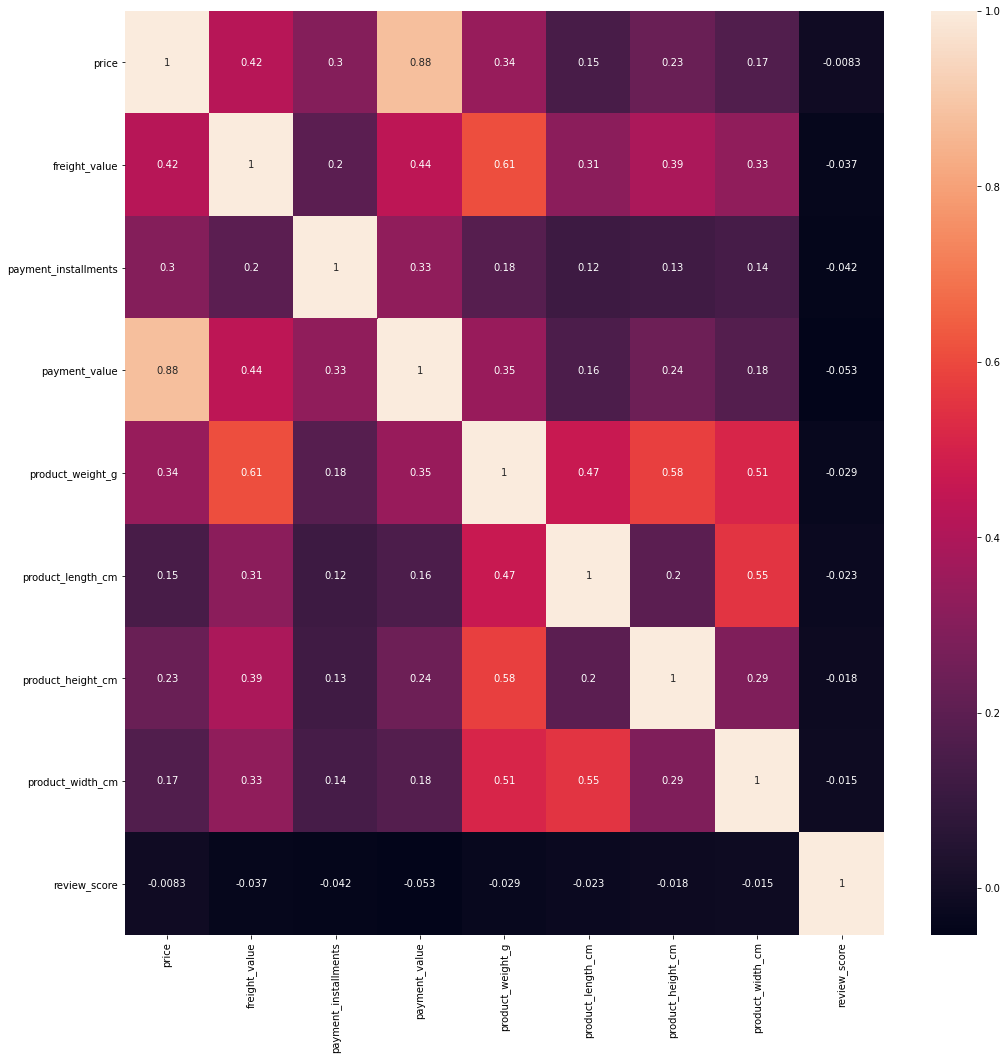

In [130]:
ecommerce_df.corr()
plt.figure(figsize = (17,17))
sns.heatmap(ecommerce_df.corr(),annot=True)

In [228]:
ecommerce_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106527 entries, 0 to 118308
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       106527 non-null  object        
 1   product_id                     106527 non-null  object        
 2   seller_id                      106527 non-null  object        
 3   price                          106527 non-null  float64       
 4   freight_value                  106527 non-null  float64       
 5   customer_id                    106527 non-null  object        
 6   order_status                   106527 non-null  object        
 7   order_purchase_timestamp       106527 non-null  datetime64[ns]
 8   order_approved_at              106527 non-null  datetime64[ns]
 9   order_delivered_carrier_date   106527 non-null  datetime64[ns]
 10  order_delivered_customer_date  106527 non-null  datetime64[ns]
 11  

In [230]:
plt.figure(figsize=(14,8))

X_graph = ecommerce_df.groupby('customer_id').sum()[['order_status','price']].reset_index()['order_status']
Y_price_graph = ecommerce_df.groupby('customer_id').sum()[['order_status','price']].reset_index()['price']
sns.regplot(x=X_graph , y=Y_price_graph,scatter_kws={'alpha':0.7, 'color':'blue'}, line_kws={'color':'red'});

plt.title('Price Vs. No. Customers Scatterplot'.title(), fontsize=22)
plt.xlabel('Product Weight (Grams)'.title(), fontsize=15)
plt.ylabel('Freight Value'.title(), fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

KeyError: "['order_status'] not in index"

<Figure size 1008x576 with 0 Axes>

In [231]:
product_weight_graph

0        39468.0
1          352.0
2        16905.0
3        28800.0
4        15300.0
          ...   
98194     3080.0
98195    60000.0
98196    12000.0
98197    11808.0
98198     8000.0
Name: product_volumn, Length: 98199, dtype: float64

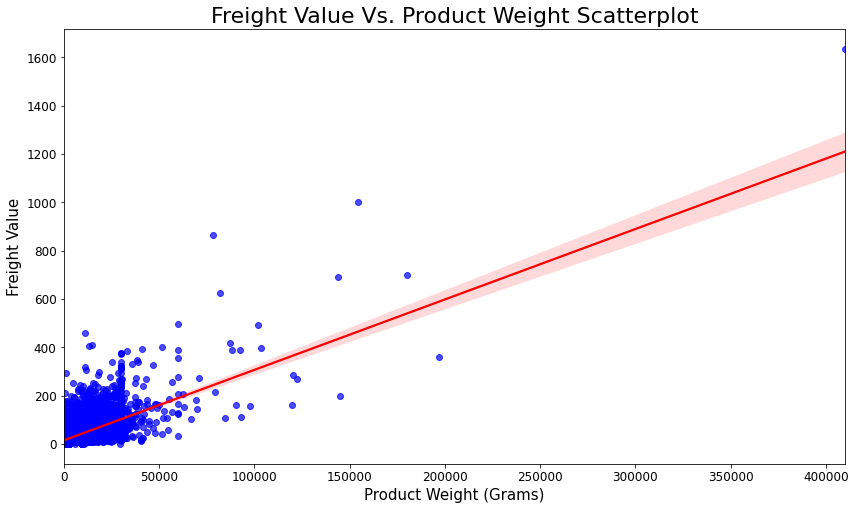

In [131]:
plt.figure(figsize=(14,8))

product_weight_graph = ecommerce_df.groupby('customer_id').sum()[['product_weight_g','freight_value']].reset_index()['product_weight_g']
freight_value_graph = ecommerce_df.groupby('customer_id').sum()[['product_weight_g','freight_value']].reset_index()['freight_value']
sns.regplot(x=product_weight_graph, y=freight_value_graph,scatter_kws={'alpha':0.7, 'color':'blue'}, line_kws={'color':'red'});

plt.title('Freight Value Vs. Product Weight Scatterplot'.title(), fontsize=22)
plt.xlabel('Product Weight (Grams)'.title(), fontsize=15)
plt.ylabel('Freight Value'.title(), fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Product Volumn 

In [132]:
ecommerce_df['product_volumn'] = ecommerce_df['product_length_cm']*ecommerce_df['product_height_cm']*ecommerce_df['product_width_cm']
ecommerce_df

,order_id,product_id,seller_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_message,customer_unique_id,customer_city,customer_state,seller_city,seller_state,product_volumn
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,2.0,72.19,cool_stuff,650.0,28.0,9.0,14.0,97ca439bc427b48bc1cd7177abe71365,5.0,"Perfeito, produto entregue antes do combinado.",871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ,volta redonda,SP,3528.0
1,130898c0987d1801452a8ed92a670612,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.90,17.96,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,2017-06-29 02:44:11,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-07-26 00:00:00,1.0,73.86,cool_stuff,650.0,28.0,9.0,14.0,b11cba360bbe71410c291b764753d37f,5.0,"lannister como sempre, entregou certinho e den...",0fb8e3eab2d3e79d92bb3fffbb97f188,jatai,GO,volta redonda,SP,3528.0
2,532ed5e14e24ae1f0d735b91524b98b9,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,64.90,18.33,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,2018-05-18 12:31:43,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-06-07 00:00:00,2.0,83.23,cool_stuff,650.0,28.0,9.0,14.0,af01c4017c5ab46df6cc810e069e654a,4.0,carrinho muito bonito,3419052c8c6b45daf79c1e426f9e9bcb,belo horizonte,MG,volta redonda,SP,3528.0
3,6f8c31653edb8c83e1a739408b5ff750,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,16.17,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,2017-08-01 18:55:08,2017-08-02 19:07:36,2017-08-09 21:26:33,2017-08-25 00:00:00,3.0,75.07,cool_stuff,650.0,28.0,9.0,14.0,8304ff37d8b16b57086fa283fe0c44f8,5.0,NaN,e7c828d22c0682c1565252deefbe334d,sao jose dos pinhais,PR,volta redonda,SP,3528.0
4,7d19f4ef4d04461989632411b7e588b9,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,2017-08-10 22:05:11,2017-08-11 19:43:07,2017-08-24 20:04:21,2017-09-01 00:00:00,4.0,72.19,cool_stuff,650.0,28.0,9.0,14.0,426f43a82185969503fb3c86241a9535,5.0,NaN,0bb98ba72dcc08e95f9d8cc434e9a2cc,conselheiro lafaiete,MG,volta redonda,SP,3528.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118303,fd607d0a02cb276bc764a15f80f0423f,02ad78835ec3f72e750d1dfa6a7e11b3,2a73cba571d90c694b7caca072ccf6ce,171.39,19.35,fef79774a4f4ef014078bcb0b42d0cc5,delivered,2018-07-26 09:13:04,2018-07-27 02:24:15,2018-08-07 09:28:00,2018-08-16 17:12:37,2018-08-16 00:00:00,1.0,381.48,furniture_decor,1250.0,52.0,7.0,11.0,bb6e8f1301a860d4f8f42c1170608ead,5.0,NaN,c13401002a5f9b60befb4c720de50be0,salvador,BA,sao caetano do sul,SP,4004.0
118305,fdaf98feac227eb978d8f33f36e0231d,f739e9151702508b18f796c53005e5e9,d1aa1ec0839dcab73a6161130eb1f94a,119.90,16.14,81ae83ce1a10af9f93fa3512bd9713b1,delivered,2017-04-19 10:20:51,2017-04-21 05:10:28,2017-05-04 15:06:24,2017-05-24 10:52:43,2017-05-22 00:00:00,1.0,136.04,furniture_decor,1000.0,69.0,11.0,11.0,fd48db39884359395ff6f18c8822aa7b,4.0,NaN,3d50a44231c2a153219cef76ee3e445d,rio de janeiro,RJ,curitiba,PR,8349.0
118306,fe68b52db13993f58175fa589125d345,f4135cbdece8245560f7be179533797a,3fefda3299e6dfaea3466ef346a3571a,209.00,16.21,94203a446c1b46b5ac95b0aaf7221804,delivered,2017-08-11 10:15:22,2017-08-12 02:55:27,2017-08-14 22:03:19,2017-08-17 17:47:55,2017-09-04 00:00:00,1.0,225.21,electronics,500.0,17.0,9.0,25.0,cd6f089e896732c91671704c7f51790e,4.0,NaN,52a953541861bbb4b79b39df24e00243,lim

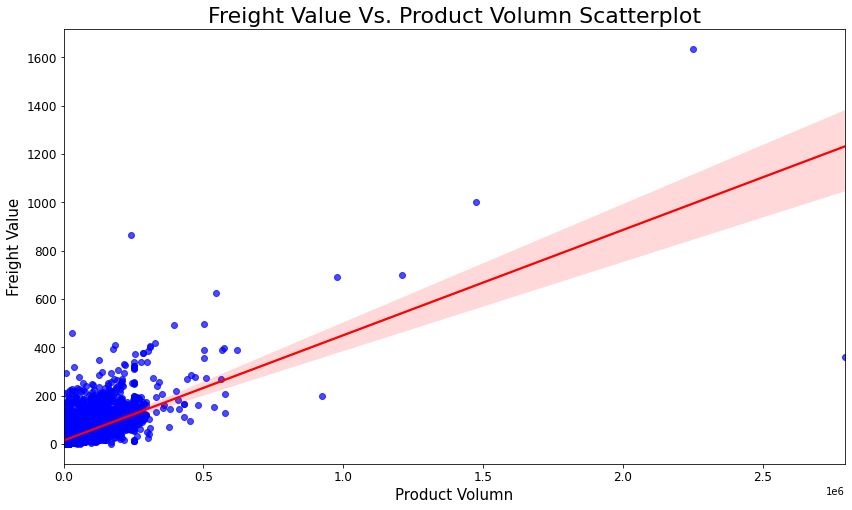

In [133]:
plt.figure(figsize=(14,8))

product_weight_graph = ecommerce_df.groupby('customer_id').sum()[['product_volumn','freight_value']].reset_index()['product_volumn']
freight_value_graph = ecommerce_df.groupby('customer_id').sum()[['product_volumn','freight_value']].reset_index()['freight_value']
sns.regplot(x=product_weight_graph, y=freight_value_graph,scatter_kws={'alpha':0.7, 'color':'blue'}, line_kws={'color':'red'});

plt.title('Freight Value Vs. Product Volumn Scatterplot'.title(), fontsize=22)
plt.xlabel('Product Volumn'.title(), fontsize=15)
plt.ylabel('Freight Value'.title(), fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Adjust the date to the correct format

In [134]:

ecommerce_df.order_approved_at = pd.to_datetime(ecommerce_df.order_approved_at ) 
ecommerce_df.order_purchase_timestamp = pd.to_datetime(ecommerce_df.order_purchase_timestamp )
ecommerce_df.order_delivered_customer_date = pd.to_datetime(ecommerce_df.order_delivered_customer_date) 
ecommerce_df.order_delivered_carrier_date = pd.to_datetime(ecommerce_df.order_delivered_carrier_date) 
ecommerce_df.order_estimated_delivery_date = pd.to_datetime(ecommerce_df.order_estimated_delivery_date) 
 


In [135]:
ecommerce_df['purchase_year']=ecommerce_df.order_purchase_timestamp.dt.year 
ecommerce_df['purchase_month']=ecommerce_df.order_purchase_timestamp.dt.month 
ecommerce_df['purchase_day_of_week']=ecommerce_df.order_purchase_timestamp.dt.day_of_week 
ecommerce_df['actual_delivery_time']=(ecommerce_df.order_delivered_customer_date - ecommerce_df.order_purchase_timestamp).dt.days 
ecommerce_df['carrier_delivery_time']=(ecommerce_df.order_delivered_carrier_date - ecommerce_df.order_purchase_timestamp).dt.days 
ecommerce_df['estimated_delivery_time']=(ecommerce_df.order_estimated_delivery_date - ecommerce_df.order_purchase_timestamp).dt.days 


In [136]:
ecommerce_df

,order_id,product_id,seller_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_message,customer_unique_id,customer_city,customer_state,seller_city,seller_state,product_volumn,purchase_year,purchase_month,purchase_day_of_week,actual_delivery_time,carrier_delivery_time,estimated_delivery_time
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,2.0,72.19,cool_stuff,650.0,28.0,9.0,14.0,97ca439bc427b48bc1cd7177abe71365,5.0,"Perfeito, produto entregue antes do combinado.",871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ,volta redonda,SP,3528.0,2017,9,2,7,6,15
1,130898c0987d1801452a8ed92a670612,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.90,17.96,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,2017-06-29 02:44:11,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-07-26,1.0,73.86,cool_stuff,650.0,28.0,9.0,14.0,b11cba360bbe71410c291b764753d37f,5.0,"lannister como sempre, entregou certinho e den...",0fb8e3eab2d3e79d92bb3fffbb97f188,jatai,GO,volta redonda,SP,3528.0,2017,6,2,15,7,27
2,532ed5e14e24ae1f0d735b91524b98b9,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,64.90,18.33,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,2018-05-18 12:31:43,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-06-07,2.0,83.23,cool_stuff,650.0,28.0,9.0,14.0,af01c4017c5ab46df6cc810e069e654a,4.0,carrinho muito bonito,3419052c8c6b45daf79c1e426f9e9bcb,belo horizonte,MG,volta redonda,SP,3528.0,2018,5,4,17,5,19
3,6f8c31653edb8c83e1a739408b5ff750,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,16.17,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,2017-08-01 18:55:08,2017-08-02 19:07:36,2017-08-09 21:26:33,2017-08-25,3.0,75.07,cool_stuff,650.0,28.0,9.0,14.0,8304ff37d8b16b57086fa283fe0c44f8,5.0,NaN,e7c828d22c0682c1565252deefbe334d,sao jose dos pinhais,PR,volta redonda,SP,3528.0,2017,8,1,8,1,23
4,7d19f4ef4d04461989632411b7e588b9,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,2017-08-10 22:05:11,2017-08-11 19:43:07,2017-08-24 20:04:21,2017-09-01,4.0,72.19,cool_stuff,650.0,28.0,9.0,14.0,426f43a82185969503fb3c86241a9535,5.0,NaN,0bb98ba72dcc08e95f9d8cc434e9a2cc,conselheiro lafaiete,MG,volta redonda,SP,3528.0,2017,8,3,13,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118303,fd607d0a02cb276bc764a15f80f0423f,02ad78835ec3f72e750d1dfa6a7e11b3,2a73cba571d90c694b7caca072ccf6ce,171.39,19.35,fef79774a4f4ef014078bcb0b42d0cc5,delivered,2018-07-26 09:13:04,2018-07-27 02:24:15,2018-08-07 09:28:00,2018-08-16 17:12:37,2018-08-16,1.0,381.48,furniture_decor,1250.0,52.0,7.0,11.0,bb6e8f1301a860d4f8f42c1170608ead,5.0,NaN,c13401002a5f9b60befb4c720de50be0,salvador,BA,sao caetano do sul,SP,4004.0,2018,7,3,21,12,20
118305,fdaf98feac227eb978d8f33f36e0231d,f739e9151702508b18f796c53005e5e9,d1aa1ec0839dcab73a6161130eb1f94a,119.90,16.14,81ae83ce1a10af9f93fa3512bd9713b1,delivered,2017-04-19 10:20:51,2017-04-21 05:10:28,2017-05-04 15:06:24,2017-05-24 10:52:43,2017-05-22,1.0,136.04,furniture_decor,1000.0,69.0,11.0,11.0,fd48db39884359395ff6f18c8822aa7b,4.0,NaN,3d50a44231c2a153219cef76ee3e445d,rio de janeiro,RJ,curitiba,PR,8349.0,2017,4,2,35,15,32
118306,fe68b52db13993f58175fa589125d345,f4135cbdece8245560f7be179533797a,3fefda3299e6dfaea3466ef346a3571a,209.00,16.21,94203a446c1b46b5ac95b0aaf7221804,delivered,2017-08-11 10:15:22,201

In [137]:
delivery_status_check = ecommerce_df['actual_delivery_time'] > ecommerce_df['estimated_delivery_time']
ecommerce_df['delivery_delay'] = delivery_status_check
ecommerce_df['delivery_delay'] = ecommerce_df['delivery_delay'].replace(True, 1)
ecommerce_df['delivery_delay'] = ecommerce_df['delivery_delay'].replace(False, 0)
ecommerce_df

,order_id,product_id,seller_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_message,customer_unique_id,customer_city,customer_state,seller_city,seller_state,product_volumn,purchase_year,purchase_month,purchase_day_of_week,actual_delivery_time,carrier_delivery_time,estimated_delivery_time,delivery_delay
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,2.0,72.19,cool_stuff,650.0,28.0,9.0,14.0,97ca439bc427b48bc1cd7177abe71365,5.0,"Perfeito, produto entregue antes do combinado.",871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ,volta redonda,SP,3528.0,2017,9,2,7,6,15,0
1,130898c0987d1801452a8ed92a670612,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.90,17.96,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,2017-06-29 02:44:11,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-07-26,1.0,73.86,cool_stuff,650.0,28.0,9.0,14.0,b11cba360bbe71410c291b764753d37f,5.0,"lannister como sempre, entregou certinho e den...",0fb8e3eab2d3e79d92bb3fffbb97f188,jatai,GO,volta redonda,SP,3528.0,2017,6,2,15,7,27,0
2,532ed5e14e24ae1f0d735b91524b98b9,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,64.90,18.33,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,2018-05-18 12:31:43,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-06-07,2.0,83.23,cool_stuff,650.0,28.0,9.0,14.0,af01c4017c5ab46df6cc810e069e654a,4.0,carrinho muito bonito,3419052c8c6b45daf79c1e426f9e9bcb,belo horizonte,MG,volta redonda,SP,3528.0,2018,5,4,17,5,19,0
3,6f8c31653edb8c83e1a739408b5ff750,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,16.17,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,2017-08-01 18:55:08,2017-08-02 19:07:36,2017-08-09 21:26:33,2017-08-25,3.0,75.07,cool_stuff,650.0,28.0,9.0,14.0,8304ff37d8b16b57086fa283fe0c44f8,5.0,NaN,e7c828d22c0682c1565252deefbe334d,sao jose dos pinhais,PR,volta redonda,SP,3528.0,2017,8,1,8,1,23,0
4,7d19f4ef4d04461989632411b7e588b9,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,2017-08-10 22:05:11,2017-08-11 19:43:07,2017-08-24 20:04:21,2017-09-01,4.0,72.19,cool_stuff,650.0,28.0,9.0,14.0,426f43a82185969503fb3c86241a9535,5.0,NaN,0bb98ba72dcc08e95f9d8cc434e9a2cc,conselheiro lafaiete,MG,volta redonda,SP,3528.0,2017,8,3,13,0,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118303,fd607d0a02cb276bc764a15f80f0423f,02ad78835ec3f72e750d1dfa6a7e11b3,2a73cba571d90c694b7caca072ccf6ce,171.39,19.35,fef79774a4f4ef014078bcb0b42d0cc5,delivered,2018-07-26 09:13:04,2018-07-27 02:24:15,2018-08-07 09:28:00,2018-08-16 17:12:37,2018-08-16,1.0,381.48,furniture_decor,1250.0,52.0,7.0,11.0,bb6e8f1301a860d4f8f42c1170608ead,5.0,NaN,c13401002a5f9b60befb4c720de50be0,salvador,BA,sao caetano do sul,SP,4004.0,2018,7,3,21,12,20,1
118305,fdaf98feac227eb978d8f33f36e0231d,f739e9151702508b18f796c53005e5e9,d1aa1ec0839dcab73a6161130eb1f94a,119.90,16.14,81ae83ce1a10af9f93fa3512bd9713b1,delivered,2017-04-19 10:20:51,2017-04-21 05:10:28,2017-05-04 15:06:24,2017-05-24 10:52:43,2017-05-22,1.0,136.04,furniture_decor,1000.0,69.0,11.0,11.0,fd48db39884359395ff6f18c8822aa7b,4.0,NaN,3d50a44231c2a153219cef76ee3e445d,rio de janeiro,RJ,curitiba,PR,8349.0,2017,4,2,35,15,32,1
118306,fe68b52db13993f58175fa589125d345,f4135cbdece8245560f7be179533797a,3fefda3299e6dfaea3466ef346a3571a,209.00,16.21,94203a446c1b46b5ac95b0aaf7221804,

In [138]:
shippinggraph_df = ecommerce_df["delivery_delay"].value_counts()

In [233]:
shippinggraph_df.value_counts

<bound method IndexOpsMixin.value_counts of 0    98780
1     7747
Name: delivery_delay, dtype: int64>

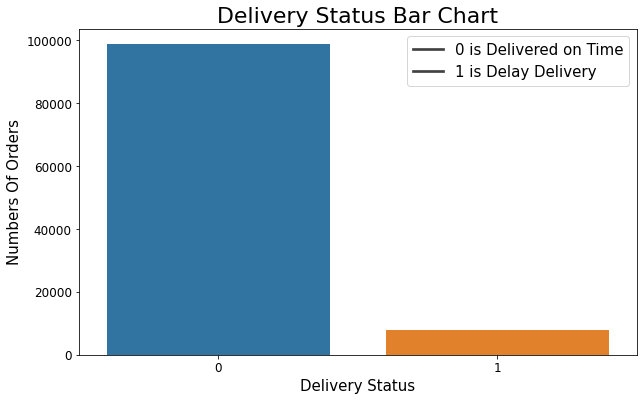

In [232]:
plt.figure(figsize=(10,6))
sns.barplot(x=shippinggraph_df.index, y=shippinggraph_df.values)

plt.title('Delivery Status Bar Chart'.title(), fontsize=22)
plt.xlabel('Delivery Status'.title(), fontsize=15)
plt.ylabel('Numbers of Orders'.title(), fontsize=15)
plt.legend(['0 is Delivered on Time', '1 is Delay Delivery'], fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [140]:
ecommerce_df["order_status"].value_counts()

delivered     104678
shipped         1191
invoiced         337
processing       319
approved           2
Name: order_status, dtype: int64

In [141]:
shipping_df = ecommerce_df[['order_status','freight_value','product_volumn','product_weight_g','estimated_delivery_time','actual_delivery_time', 'delivery_delay']]
shipping_df

,order_status,freight_value,product_volumn,product_weight_g,estimated_delivery_time,actual_delivery_time,delivery_delay
0,delivered,13.29,3528.0,650.0,15,7,0
1,delivered,17.96,3528.0,650.0,27,15,0
2,delivered,18.33,3528.0,650.0,19,17,0
3,delivered,16.17,3528.0,650.0,23,8,0
4,delivered,13.29,3528.0,650.0,21,13,0
...,...,...,...,...,...,...,...
118303,delivered,19.35,4004.0,1250.0,20,21,1
118305,delivered,16.14,8349.0,1000.0,32,35,1
118306,delivered,16.21,3825.0,500.0,23,6,0
118307,delivered,193.21,45684.0,5660.0,15,20,1


In [142]:
shipping_df.describe()

,freight_value,product_volumn,product_weight_g,estimated_delivery_time,actual_delivery_time,delivery_delay
count,106527.000000,106527.000000,106527.000000,106527.000000,106527.000000,106527.000000
mean,20.136128,15241.649713,2102.113492,23.496175,-292.848207,0.072723
std,15.883592,23555.318677,3773.059535,8.816749,2289.233458,0.259683
min,0.000000,0.000000,0.000000,2.000000,-17778.000000,0.000000
25%,13.160000,2816.000000,300.000000,18.000000,6.000000,0.000000
50%,16.350000,6400.000000,700.000000,23.000000,10.000000,0.000000
75%,21.230000,18375.000000,1800.000000,28.000000,15.000000,0.000000
max,409.680000,296208.000000,40425.000000,155.000000,209.000000,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='actual_delivery_time'>

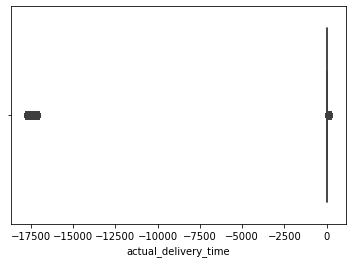

In [143]:
sns.boxplot(shipping_df['actual_delivery_time'])

In [144]:
find_df = shipping_df['actual_delivery_time'] <= 0
shipping_df[find_df]


,order_status,freight_value,product_volumn,product_weight_g,estimated_delivery_time,actual_delivery_time,delivery_delay
15,shipped,18.18,20250.0,2275.0,24,-17403,0
33,invoiced,18.23,20160.0,1167.0,22,-17443,0
64,invoiced,16.11,4050.0,550.0,26,-17440,0
158,invoiced,18.51,12240.0,900.0,25,-17481,0
184,shipped,16.92,41664.0,6950.0,31,-17361,0
...,...,...,...,...,...,...,...
118279,shipped,45.98,74307.0,15008.0,6,-17764,0
118295,processing,42.07,63882.0,2000.0,24,-17228,0
118296,processing,42.07,63882.0,2000.0,24,-17228,0
118297,processing,8.72,7200.0,400.0,10,-17491,0


In [145]:
#Drop outlier
shipping_df.drop(shipping_df[shipping_df['actual_delivery_time']<= 0].index, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [146]:
def outlier_filter(shipping_df, no_std_dev = 3):
    for col in shipping_df.columns:
        if shipping_df[col].dtype == 'float':
            stand = shipping_df[col].std()
            med = shipping_df[col].median()
            upper_lim = med + no_std_dev*stand
            lower_lim = med - no_std_dev*stand
            shipping_df[col] = shipping_df[col].apply(lambda x: np.nan if x > upper_lim or x < lower_lim else x)
        result = shipping_df.dropna()
        return result 
shipping_df = outlier_filter(shipping_df)

In [147]:
shipping_df.describe()

,freight_value,product_volumn,product_weight_g,estimated_delivery_time,actual_delivery_time,delivery_delay
count,104656.000000,104656.000000,104656.000000,104656.000000,104656.000000,104656.000000
mean,20.087441,15170.560369,2095.069399,23.459601,12.054502,0.074023
std,15.781890,23401.382993,3758.248911,8.777674,9.545784,0.261810
min,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000
25%,13.140000,2816.000000,300.000000,18.000000,6.000000,0.000000
50%,16.330000,6400.000000,700.000000,23.000000,10.000000,0.000000
75%,21.192500,18228.000000,1800.000000,28.000000,15.000000,0.000000
max,409.680000,296208.000000,40425.000000,155.000000,209.000000,1.000000


In [148]:
shipping_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104656 entries, 0 to 118308
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   order_status             104656 non-null  object 
 1   freight_value            104656 non-null  float64
 2   product_volumn           104656 non-null  float64
 3   product_weight_g         104656 non-null  float64
 4   estimated_delivery_time  104656 non-null  int64  
 5   actual_delivery_time     104656 non-null  int64  
 6   delivery_delay           104656 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 6.4+ MB


In [149]:
find_df = shipping_df['actual_delivery_time'] <= 0
shipping_df[find_df]

,order_status,freight_value,product_volumn,product_weight_g,estimated_delivery_time,actual_delivery_time,delivery_delay


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='actual_delivery_time'>

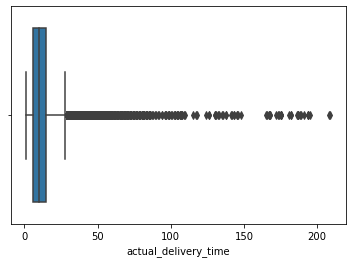

In [150]:
# sort this out 
sns.boxplot(shipping_df['actual_delivery_time'])

<AxesSubplot:>

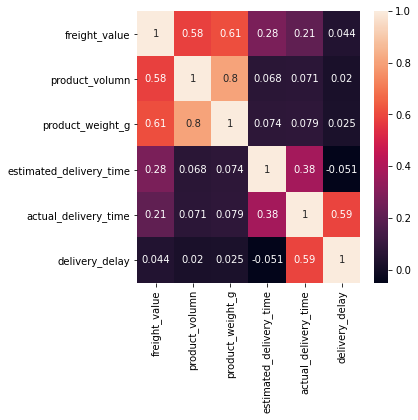

In [151]:
shipping_df.corr()
plt.figure(figsize = (5,5))
sns.heatmap(shipping_df.corr(),annot=True)

# Start shipping_df machine learning 


In [152]:
# predictors = shipping_df[['freight_value','product_volumn','product_weight_g', 'estimated_delivery_time' ]]
# target = shipping_df['delivery_delay']

In [153]:
# X = predictors
# y = target 

# X_transform = StandardScaler().fit_transform(X)

# X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.20, random_state=42)

In [154]:
# #model 

# RFC_model = RandomForestClassifier(criterion='entropy', random_state=10)
# logres_model = LogisticRegression()
# lasso_model = Lasso()
# ridge_model = Ridge()
# DTC_model = DecisionTreeClassifier(random_state=10)
# knn_model = KNeighborsClassifier(n_neighbors=5)

# Random tree classification

In [155]:
# RFC_model.fit(X_train, y_train) 
# RFC_model.score(X_train, y_train) 


In [156]:
# RFC_model.score(X_test, y_test) 

In [157]:
# RFC_y_pred = RFC_model.predict(X_train)
# print("Accuracy:",metrics.accuracy_score(y_train, RFC_y_pred))
# print("Precision:",metrics.precision_score(y_train,RFC_y_pred))
# print("Recall:",metrics.recall_score(y_train,RFC_y_pred))

# LogisticRegression

In [158]:
# logres_model.fit(X_train, y_train) 
# logres_model.score(X_train, y_train) 


In [159]:
# logres_model.score(X_test, y_test) 

In [160]:
# logres_y_pred = logres_model.predict(X_train)
# print("Accuracy:",metrics.accuracy_score(y_train, logres_y_pred))
# print("Precision:",metrics.precision_score(y_train,logres_y_pred))
# print("Recall:",metrics.recall_score(y_train,logres_y_pred))

 # lasso regression 

In [161]:
# lasso_model.fit(X_train, y_train) 
# lasso_model.score(X_train, y_train) 


In [162]:
# lasso_model.score(X_test, y_test) 

In [163]:
# logres_y_pred = logres_model.predict(X_train)
# print("Accuracy:",metrics.accuracy_score(y_train, logres_y_pred))
# print("Precision:",metrics.precision_score(y_train,logres_y_pred))
# print("Recall:",metrics.recall_score(y_train,logres_y_pred))

# Ridge model

In [164]:
# ridge_model.fit(X_train, y_train) 
# ridge_model.score(X_train, y_train) 


In [165]:
# ridge_model.score(X_test, y_test) 

# Decision Tree classification

In [166]:
# DTC_model.fit(X_train, y_train)
# DTC_model.score(X_train, y_train) 


In [167]:
# DTC_model.score(X_test, y_test) 

# K nearest neigbour 

In [168]:
# knn_model.fit(X_train, y_train) 
# knn_model.score(X_train, y_train) 

In [169]:
# knn_model.score(X_test, y_test) 

# Product analysis 

In [170]:

top_10_prod_categories = ecommerce_df.groupby('product_category_name')['product_id'].count().sort_values(ascending=False).head(10)
top_10_prod_categories

product_category_name
bed_bath_table           10856
health_beauty             9268
sports_leisure            8103
furniture_decor           7137
computers_accessories     7129
housewares                6311
watches_gifts             5972
telephony                 4417
auto                      4104
toys                      4083
Name: product_id, dtype: int64

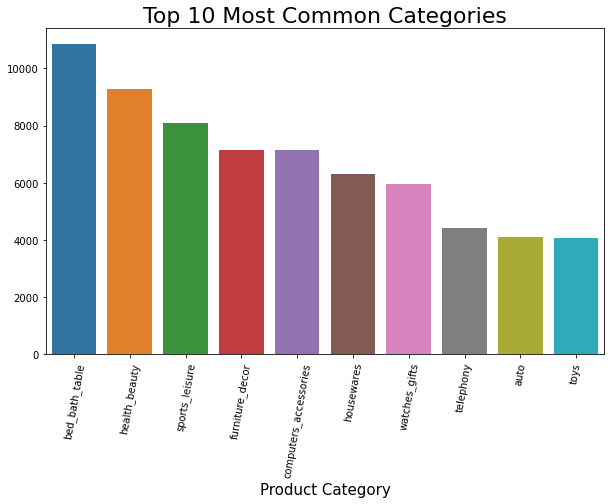

In [171]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_prod_categories.index, y=top_10_prod_categories.values)
plt.xticks(rotation=80) 
plt.xlabel('Product Category', fontsize = 15) 
plt.title('Top 10 Most Common Categories', fontsize = 22)
plt.show()


In [172]:
# next step is to filter bed bath table and find which product Id have the highest rating base on review score 

In [173]:
bed_bath_table_info = ecommerce_df['product_category_name'] == 'bed_bath_table'
bed_bath_table_df = ecommerce_df[bed_bath_table_info]
bed_bath_table_df

,order_id,product_id,seller_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_message,customer_unique_id,customer_city,customer_state,seller_city,seller_state,product_volumn,purchase_year,purchase_month,purchase_day_of_week,actual_delivery_time,carrier_delivery_time,estimated_delivery_time,delivery_delay
320,ae8b5df90eaf220f63f5ed4865cd222c,41da75141264c3bde21ecea85a4cb8b7,5b51032eddd242adc84c38acab88f23d,384.0,18.71,3d4bc7f585bc0534e4a0c00c086721b2,delivered,2018-03-17 15:48:01,2018-03-17 16:08:50,2018-03-19 19:52:50,2018-04-02 16:46:46,2018-04-16,10.0,1525.78,bed_bath_table,8800.0,33.0,12.0,33.0,801b85d8529718addf3352ea962e89f5,1.0,Meus pedidos não foram entregues.,b60a410d454528f9b70cd6fb479fba68,arraial do cabo,RJ,borda da mata,MG,13068.0,2018,3,5,16,2,29,0
322,2e94b3f76e8e8c9aaca60e91b303c5f8,a81fc5e66120ebdb295873f74a45c5b7,5b51032eddd242adc84c38acab88f23d,124.0,15.17,d4eb21f0bb4682f3b17464f064c45f28,delivered,2018-06-16 21:40:32,2018-06-16 21:55:56,2018-06-20 14:34:00,2018-06-23 16:42:27,2018-07-12,6.0,139.17,bed_bath_table,2350.0,33.0,8.0,33.0,a83ba5ae6453502b5c198856c9dc9540,4.0,NaN,6eb8a2a89a8603f8c7935a870d707b60,belo horizonte,MG,borda da mata,MG,8712.0,2018,6,5,6,3,25,0
327,a017bed18c5f129119f36a92642a1cc0,444d53deb5d80250e5e44dd416f20298,5b51032eddd242adc84c38acab88f23d,259.0,19.64,05ebc27279c0c9082b56bbd6a1441a4b,delivered,2018-06-06 10:11:20,2018-06-08 03:13:36,2018-06-08 14:40:00,2018-06-15 17:32:48,2018-07-18,1.0,278.64,bed_bath_table,2400.0,33.0,12.0,33.0,af0aca9681a4d8b83b6abbc9bf8391f3,5.0,NaN,25084c562406811ccea6b10655d1fff9,osasco,SP,borda da mata,MG,13068.0,2018,6,2,9,2,41,0
329,f18209d8f562e6e43f73013f3e9aa40c,6668e2c5a29f47a016858f28a3673e4a,5b51032eddd242adc84c38acab88f23d,219.0,27.61,34497fb7afde431c36bfe5d62cb39716,delivered,2018-04-27 16:10:14,2018-04-27 16:32:32,2018-04-30 14:44:00,2018-05-02 14:58:40,2018-05-25,10.0,246.61,bed_bath_table,3950.0,33.0,14.0,33.0,867cde0a72bc79d8f2d76528520d5fbe,3.0,Adquiri a cortina pois gostei dos detalhes e p...,56bdd6ad82ffc0e993f50cb87c849d3c,itupeva,SP,borda da mata,MG,15246.0,2018,4,4,4,2,27,0
390,055a2893cb600bebc05a16d06e3de36f,abe236a52dbc43e90bad00fe6d794582,6426d21aca402a131fc0a5d0960a3c90,59.9,16.18,424593758067a693edc0b912ae09add5,delivered,2017-07-28 09:14:22,2017-07-28 09:25:09,2017-07-28 14:57:43,2017-08-08 19:03:27,2017-08-21,7.0,76.08,bed_bath_table,800.0,34.0,17.0,22.0,76e76375f85f230b1f5f17aaf9d81aa5,5.0,Produto de qualidade e entregue antes do prazo,fa57fc078415d5327bb4dbb5e5d10d2a,rio de janeiro,RJ,ribeirao preto,SP,12716.0,2017,7,4,11,0,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118047,b76a3d04749c4594b548c8bf8c76270d,739e8ddbbd7a0d61e33949614a14d8cb,1cbdc7cf130a41fd13a3c2a7d2fcfda7,82.9,15.43,7633accb101fb669114ec8b7daf22e55,delivered,2018-05-06 11:15:20,2018-05-07 17:56:19,2018-05-09 10:47:00,2018-05-17 16:21:28,2018-05-23,1.0,98.33,bed_bath_table,1150.0,55.0,15.0,45.0,a20fb4fb23b53f9485e659ee9228f663,5.0,"Entrega dentro do prazo, produto de qualidade.",e9a4624ca1b19da17fe742fb7a33fb2a,diamantina,MG,lambari,MG,37125.0,2018,5,6,11,2,16,0
118048,c4f7d1763350c3f18548294c4beced5c,739e8ddbbd7a0d61e33949614a14d8cb,1cbdc7cf130a41fd13a3c2a7d2fcfda7,82.9,44.38,af5c992666616ec17a25e14834d3e1e6,delivered,2018-07-03 10:46:01,2018-07-05 16:40:34,2018-07-04 07:50:00,2018-07-09 14:48:45,2018-07-30,2.0,127.28,bed_bath_table,1150.0,55.0,15.0,45.0,c73b48bf62087ea26eb3d3121c938871,5.0,Muito confortável,5e15b48219b4d7853292325d892f9c7f,niteroi,RJ,lambari,MG,37125.0,2018,7,1,6,0,26,0
118163,d0b0379d6c107d02aa717e29afa60cb2,39bb2f298480bb8f763c1729a4db03cb,e72b4feb7abe

In [174]:
products_review_bed_bath_table = bed_bath_table_df.groupby('product_id').agg(
    review_score_Avg = ('review_score', 'mean'),
    review_score_Count = ('review_score', 'count')
    )
products_review_bed_bath_table.sort_values(['review_score_Avg','review_score_Count'],ascending=False,inplace=True) 
products_review_bed_bath_table.head(10)

,review_score_Avg,review_score_Count
product_id,,
926a505f318353d8634f3c5102756352,5.0,13
e5ff2945f13a69162a72acc5170ba684,5.0,9
ebf9bc6cd600eadd681384e3116fda85,5.0,9
00905d58c87afcbce21420b3712cacaa,5.0,7
741158fada4f10d804c017c381d6925e,5.0,7
6c273bcb49e4c78e0de3043e5efe81f9,5.0,6
7b1f55eb9b85b0aa6b1d4c16108eac61,5.0,6
94fb18015068e3550e6a8f0729558904,5.0,6
e934947ca6b64f5a6d864e21dca13b73,5.0,6


In [175]:
products_review_catergory_df =ecommerce_df.groupby('product_category_name').agg(
    review_score_Avg = ('review_score', 'mean'),
    review_score_Count = ('review_score', 'count')
    )
products_review_catergory_df.sort_values(['review_score_Count','review_score_Avg'],ascending=False,inplace=True) 
products_review_catergory_df.head(10)

,review_score_Avg,review_score_Count
product_category_name,,
bed_bath_table,3.866802,10856
health_beauty,4.148576,9268
sports_leisure,4.143774,8103
furniture_decor,3.960347,7137
computers_accessories,3.992846,7129
housewares,4.114245,6311
watches_gifts,4.018922,5972
telephony,3.965135,4417
auto,4.066277,4104


# payment analysis 

In [176]:
# ecommerce_df.drop(columns='order_item_id', inplace=True )

KeyError: "['order_item_id'] not found in axis"

In [177]:
ecommerce_df_1 = ecommerce_df

In [178]:
ecommerce_df_1.duplicated().sum()

0

In [179]:
ecommerce_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106527 entries, 0 to 118308
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       106527 non-null  object        
 1   product_id                     106527 non-null  object        
 2   seller_id                      106527 non-null  object        
 3   price                          106527 non-null  float64       
 4   freight_value                  106527 non-null  float64       
 5   customer_id                    106527 non-null  object        
 6   order_status                   106527 non-null  object        
 7   order_purchase_timestamp       106527 non-null  datetime64[ns]
 8   order_approved_at              106527 non-null  datetime64[ns]
 9   order_delivered_carrier_date   106527 non-null  datetime64[ns]
 10  order_delivered_customer_date  106527 non-null  datetime64[ns]
 11  

In [180]:
ecommerce_df_1.drop_duplicates(inplace=True)

In [181]:
ecommerce_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106527 entries, 0 to 118308
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       106527 non-null  object        
 1   product_id                     106527 non-null  object        
 2   seller_id                      106527 non-null  object        
 3   price                          106527 non-null  float64       
 4   freight_value                  106527 non-null  float64       
 5   customer_id                    106527 non-null  object        
 6   order_status                   106527 non-null  object        
 7   order_purchase_timestamp       106527 non-null  datetime64[ns]
 8   order_approved_at              106527 non-null  datetime64[ns]
 9   order_delivered_carrier_date   106527 non-null  datetime64[ns]
 10  order_delivered_customer_date  106527 non-null  datetime64[ns]
 11  

In [182]:
payment_value_df = ecommerce_df_1.groupby(['purchase_year','purchase_month']).sum()['payment_value'].reset_index()
payment_value_df

,purchase_year,purchase_month,payment_value
0,2016,9,272.46
1,2016,10,55582.71
2,2016,12,19.62
3,2017,1,146084.32
4,2017,2,299414.94
5,2017,3,448848.57
6,2017,4,422722.13
7,2017,5,620043.22
8,2017,6,537742.02
9,2017,7,625649.21


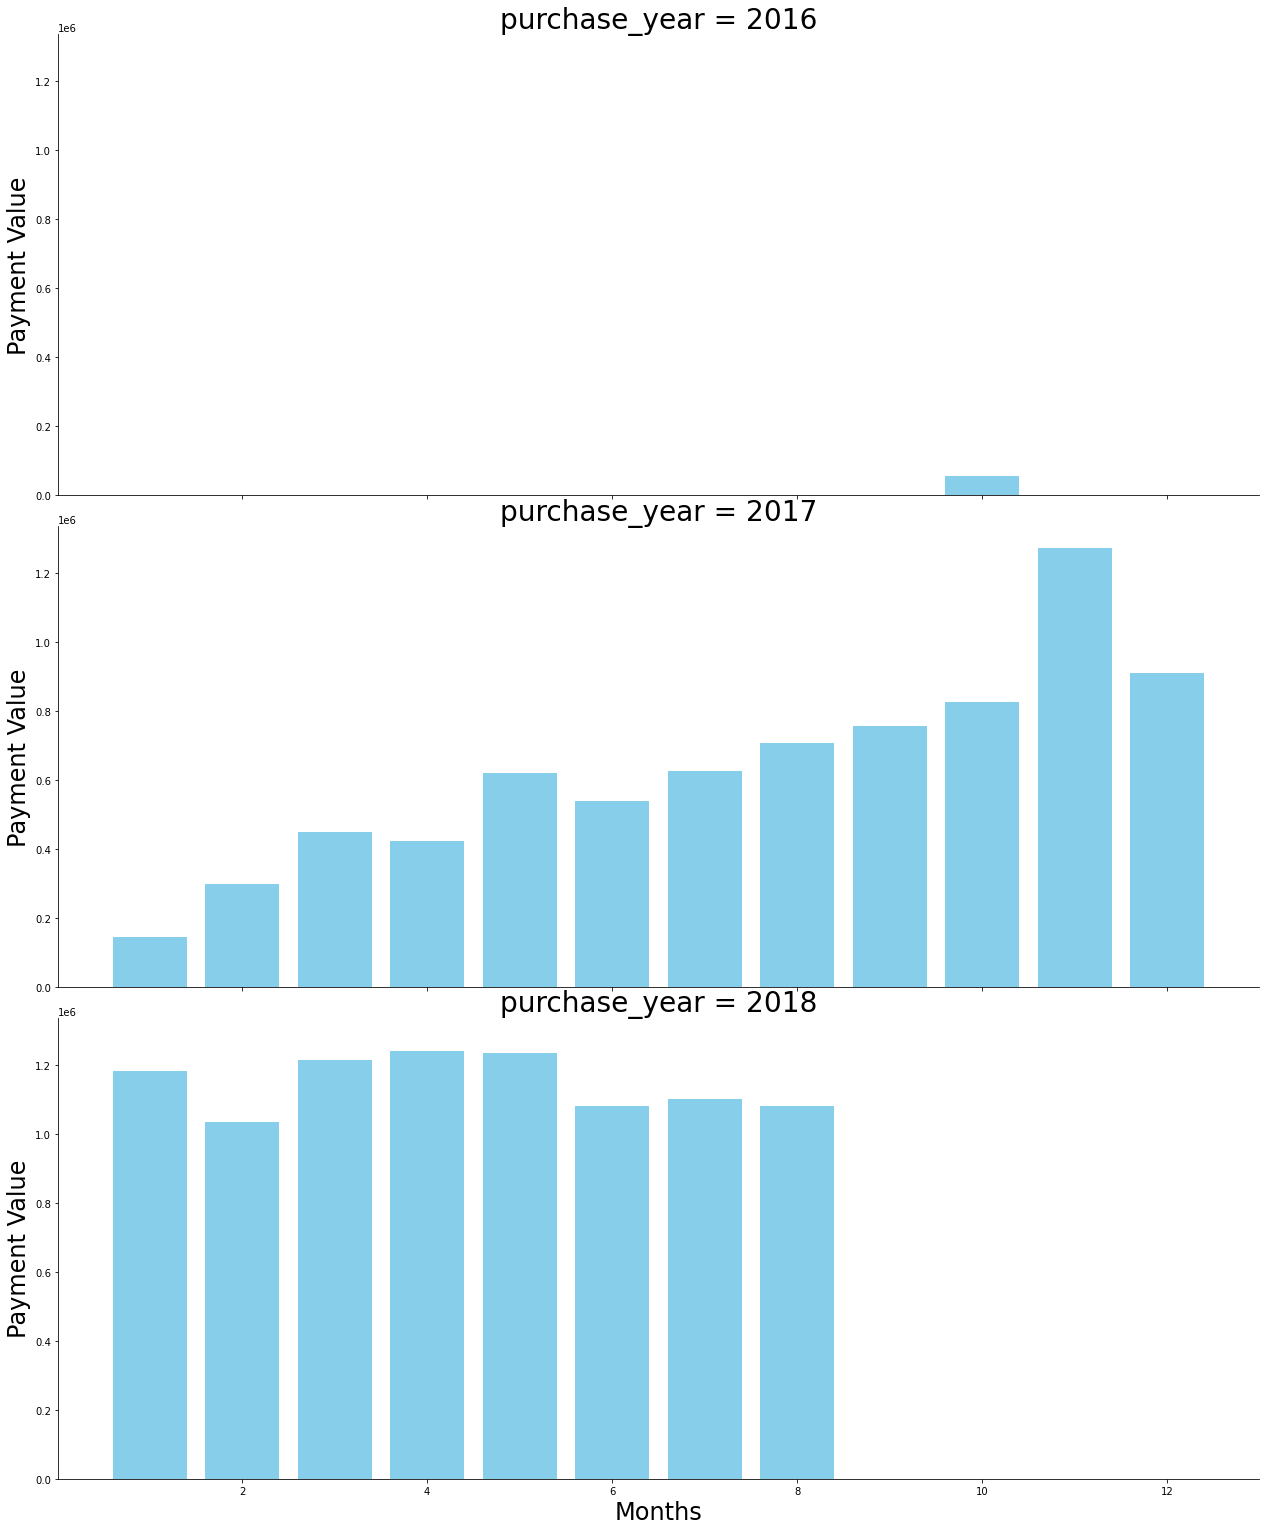

In [183]:
payment_value_graph = sns.FacetGrid(data=payment_value_df, row = 'purchase_year', height=7, aspect=2.5, sharey=True)

payment_value_graph = payment_value_graph.map(plt.bar, 'purchase_month', 'payment_value', color='skyblue')
payment_value_graph.set_titles( size=28);
payment_value_graph.set_ylabels('Payment Value'.title(), size=24);
payment_value_graph.set_xlabels('months'.title(), size=24);


# Customer RFM analysis

In [184]:
ecommerce_df['total_payment'] = ecommerce_df['payment_value'] * ecommerce_df['payment_installments']

In [185]:
# monetary
monetary = ecommerce_df.groupby('customer_unique_id')['total_payment'].sum()
monetary = monetary.reset_index()
monetary.columns = ['customer_unique_id', 'monetary']
monetary.head()

,customer_unique_id,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,1135.20
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,689.76
3,0000f6ccb0745a6a4b88665a16c9f078,174.48
4,0004aac84e0df4da2b147fca70cf8255,1181.34


In [186]:
frequency = ecommerce_df.groupby('customer_unique_id')['order_id'].count()
frequency = frequency.reset_index()
frequency.columns = ['customer_unique_id', 'frequency']
frequency.head()

,customer_unique_id,frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [187]:
max_date = max( ecommerce_df['order_purchase_timestamp'])
ecommerce_df['diff_days'] =  (max_date- ecommerce_df['order_purchase_timestamp']).dt.days

In [188]:
# Recency
recency = ecommerce_df.groupby('customer_unique_id')['diff_days'].min()
recency = recency.reset_index()
recency.columns = ['customer_unique_id', 'recency']
recency.head()

,customer_unique_id,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,115
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118
2,0000f46a3911fa3c0805444483337064,541
3,0000f6ccb0745a6a4b88665a16c9f078,325
4,0004aac84e0df4da2b147fca70cf8255,292


In [189]:
# satification = ecommerce_df.groupby('customer_unique_id')['review_score'].mean()
# satification = satification.reset_index()
# satification.columns = ['customer_unique_id', 'review_score']
# satification.head()

,customer_unique_id,review_score
0,0000366f3b9a7992bf8c76cfdf3221e2,5.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,4.0
2,0000f46a3911fa3c0805444483337064,3.0
3,0000f6ccb0745a6a4b88665a16c9f078,4.0
4,0004aac84e0df4da2b147fca70cf8255,5.0


In [190]:
rfm_df = pd.merge(monetary, frequency, on='customer_unique_id', how='inner')
rfm_df = pd.merge(rfm_df, recency, on='customer_unique_id', how='inner')

rfm_df

,customer_unique_id,monetary,frequency,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1135.20,1,115
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,1,118
2,0000f46a3911fa3c0805444483337064,689.76,1,541
3,0000f6ccb0745a6a4b88665a16c9f078,174.48,1,325
4,0004aac84e0df4da2b147fca70cf8255,1181.34,1,292
...,...,...,...,...
94978,fffcf5a5ff07b0908bd4e2dbc735a684,41348.40,2,451
94979,fffea47cd6d3cc0a88bd621562a9d061,84.58,1,266
94980,ffff371b4d645b6ecea244b27531430a,112.46,1,572
94981,ffff5962728ec6157033ef9805bacc48,668.45,1,123


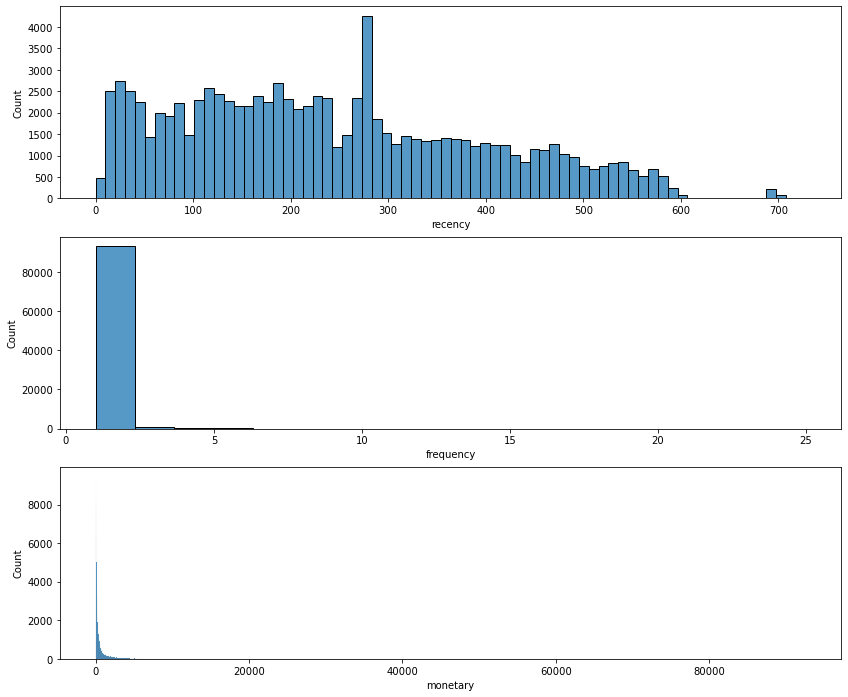

In [191]:

plt.figure(figsize=(14,12))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.histplot(rfm_df['recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.histplot(rfm_df['frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.histplot(rfm_df['monetary'])


plt.show()

In [192]:
# sns.boxplot(rfm_df['recency'])

In [193]:
# sns.boxplot(rfm_df['frequency'])

In [194]:
# sns.boxplot(rfm_df['monetary'])

In [195]:
# # removing (statistical) outliers for monetary
# Q1 = rfm_df.monetary.quantile(0.05)
# Q3 = rfm_df.monetary.quantile(0.95)
# IQR = Q3 - Q1
# rfm_df = rfm_df[(rfm_df.monetary >= Q1 - 1.5*IQR) & (rfm_df.monetary <= Q3 + 1.5*IQR)]

# # outlier treatment for frequency
# Q1 = rfm_df.frequency.quantile(0.05)
# Q3 = rfm_df.frequency.quantile(0.95)
# IQR = Q3 - Q1
# rfm_df = rfm_df[(rfm_df.frequency >= Q1 - 1.5*IQR) & (rfm_df.frequency <= Q3 + 1.5*IQR)]

In [196]:
rfm_scale = rfm_df[['monetary', 'frequency', 'recency']]

scaler = StandardScaler()
scaled_rfm_df = scaler.fit_transform(rfm_scale)

In [197]:
kmeans = KMeans(n_clusters=4,random_state=10, max_iter=100)
kmeans.fit(scaled_rfm_df)

KMeans(max_iter=100, n_clusters=4, random_state=10)

In [198]:
kmeans.labels_

array([1, 1, 0, ..., 0, 1, 0])

In [199]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state=10, max_iter=100)
    kmeanModel.fit(scaled_rfm_df)
    distortions.append(kmeanModel.inertia_)

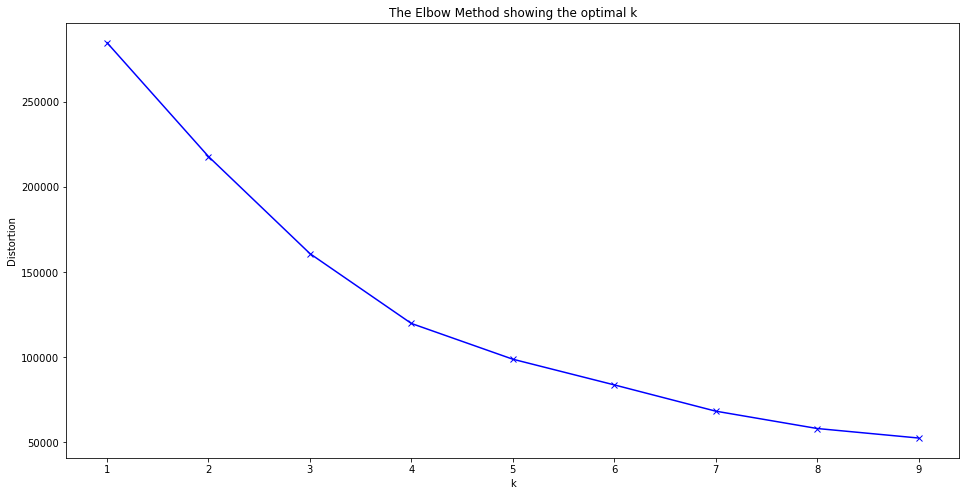

In [200]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

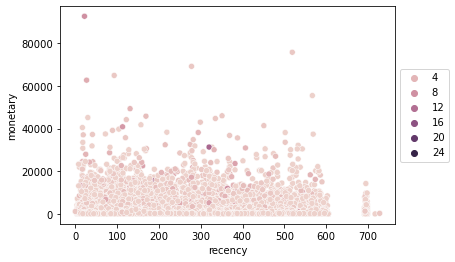

In [201]:

rfm_plot = sns.scatterplot(data=rfm_df, x= 'recency',y='monetary', hue='frequency')
rfm_plot.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.show()

In [202]:
kmeans = KMeans(n_clusters=4,random_state=10, max_iter=100)
kmeans.fit(scaled_rfm_df)

KMeans(max_iter=100, n_clusters=4, random_state=10)

In [203]:
# n_clusters = 4
rfm_df['label'] = kmeans.labels_

<AxesSubplot:xlabel='recency', ylabel='monetary'>

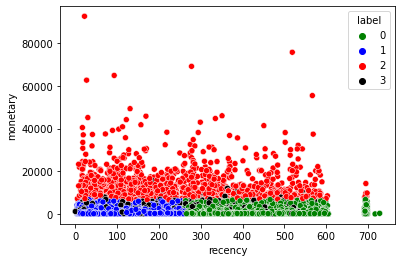

In [204]:
sns.scatterplot(data=rfm_df, x= 'recency',y='monetary', hue='label', palette=['green','blue','red','black'])

In [205]:
kmeans_3 = KMeans(n_clusters=3,random_state=10, max_iter=100)
kmeans_3.fit(scaled_rfm_df)

KMeans(max_iter=100, n_clusters=3, random_state=10)

In [206]:
rfm_df['label_3'] = kmeans_3.labels_

<AxesSubplot:xlabel='recency', ylabel='monetary'>

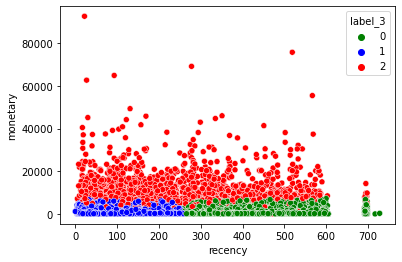

In [207]:
sns.scatterplot(data=rfm_df, x= 'recency',y='monetary', hue='label_3', palette=['green','blue','red'])

# Seller RFM Analysis 

In [208]:
ecommerce_df

,order_id,product_id,seller_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_message,customer_unique_id,customer_city,customer_state,seller_city,seller_state,product_volumn,purchase_year,purchase_month,purchase_day_of_week,actual_delivery_time,carrier_delivery_time,estimated_delivery_time,delivery_delay,total_payment,diff_days
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,2.0,72.19,cool_stuff,650.0,28.0,9.0,14.0,97ca439bc427b48bc1cd7177abe71365,5.0,"Perfeito, produto entregue antes do combinado.",871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ,volta redonda,SP,3528.0,2017,9,2,7,6,15,0,144.38,355
1,130898c0987d1801452a8ed92a670612,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.90,17.96,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,2017-06-29 02:44:11,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-07-26,1.0,73.86,cool_stuff,650.0,28.0,9.0,14.0,b11cba360bbe71410c291b764753d37f,5.0,"lannister como sempre, entregou certinho e den...",0fb8e3eab2d3e79d92bb3fffbb97f188,jatai,GO,volta redonda,SP,3528.0,2017,6,2,15,7,27,0,73.86,431
2,532ed5e14e24ae1f0d735b91524b98b9,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,64.90,18.33,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,2018-05-18 12:31:43,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-06-07,2.0,83.23,cool_stuff,650.0,28.0,9.0,14.0,af01c4017c5ab46df6cc810e069e654a,4.0,carrinho muito bonito,3419052c8c6b45daf79c1e426f9e9bcb,belo horizonte,MG,volta redonda,SP,3528.0,2018,5,4,17,5,19,0,166.46,107
3,6f8c31653edb8c83e1a739408b5ff750,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,16.17,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,2017-08-01 18:55:08,2017-08-02 19:07:36,2017-08-09 21:26:33,2017-08-25,3.0,75.07,cool_stuff,650.0,28.0,9.0,14.0,8304ff37d8b16b57086fa283fe0c44f8,5.0,NaN,e7c828d22c0682c1565252deefbe334d,sao jose dos pinhais,PR,volta redonda,SP,3528.0,2017,8,1,8,1,23,0,225.21,397
4,7d19f4ef4d04461989632411b7e588b9,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,2017-08-10 22:05:11,2017-08-11 19:43:07,2017-08-24 20:04:21,2017-09-01,4.0,72.19,cool_stuff,650.0,28.0,9.0,14.0,426f43a82185969503fb3c86241a9535,5.0,NaN,0bb98ba72dcc08e95f9d8cc434e9a2cc,conselheiro lafaiete,MG,volta redonda,SP,3528.0,2017,8,3,13,0,21,0,288.76,388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118303,fd607d0a02cb276bc764a15f80f0423f,02ad78835ec3f72e750d1dfa6a7e11b3,2a73cba571d90c694b7caca072ccf6ce,171.39,19.35,fef79774a4f4ef014078bcb0b42d0cc5,delivered,2018-07-26 09:13:04,2018-07-27 02:24:15,2018-08-07 09:28:00,2018-08-16 17:12:37,2018-08-16,1.0,381.48,furniture_decor,1250.0,52.0,7.0,11.0,bb6e8f1301a860d4f8f42c1170608ead,5.0,NaN,c13401002a5f9b60befb4c720de50be0,salvador,BA,sao caetano do sul,SP,4004.0,2018,7,3,21,12,20,1,381.48,38
118305,fdaf98feac227eb978d8f33f36e0231d,f739e9151702508b18f796c53005e5e9,d1aa1ec0839dcab73a6161130eb1f94a,119.90,16.14,81ae83ce1a10af9f93fa3512bd9713b1,delivered,2017-04-19 10:20:51,2017-04-21 05:10:28,2017-05-04 15:06:24,2017-05-24 10:52:43,2017-05-22,1.0,136.04,furniture_decor,1000.0,69.0,11.0,11.0,fd48db39884359395ff6f18c8822aa7b,4.0,NaN,3d50a44231c2a153219cef76ee3e445d,rio de janeiro,RJ,curitiba,PR,8349.0,2017,4,2,35,15,32,1,136.04,501
118306,fe68b52db13993f58175fa589125d345,f4135

In [209]:
frequency = ecommerce_df.groupby('seller_id')['order_id'].count()
frequency = frequency.reset_index()
frequency.columns = ['seller_id', 'frequency']
frequency.head()


,seller_id,frequency
0,0015a82c2db000af6aaaf3ae2ecb0532,3
1,001cca7ae9ae17fb1caed9dfb1094831,203
2,002100f778ceb8431b7a1020ff7ab48f,59
3,003554e2dce176b5555353e4f3555ac8,1
4,004c9cd9d87a3c30c522c48c4fc07416,180


In [210]:
monetary = ecommerce_df.groupby('seller_id')['total_payment'].sum()
monetary = monetary.reset_index()
monetary.columns = ['seller_id', 'monetary']
monetary.head()

,seller_id,monetary
0,0015a82c2db000af6aaaf3ae2ecb0532,20152.44
1,001cca7ae9ae17fb1caed9dfb1094831,129092.66
2,002100f778ceb8431b7a1020ff7ab48f,3915.85
3,003554e2dce176b5555353e4f3555ac8,418.14
4,004c9cd9d87a3c30c522c48c4fc07416,124338.65


In [211]:
recency = ecommerce_df.groupby('seller_id')['diff_days'].min()
recency = recency.reset_index()
recency.columns = ['seller_id', 'recency']
recency.head()

,seller_id,recency
0,0015a82c2db000af6aaaf3ae2ecb0532,320
1,001cca7ae9ae17fb1caed9dfb1094831,52
2,002100f778ceb8431b7a1020ff7ab48f,143
3,003554e2dce176b5555353e4f3555ac8,262
4,004c9cd9d87a3c30c522c48c4fc07416,122


In [212]:
satification = ecommerce_df.groupby('seller_id')['review_score'].mean()
satification = satification.reset_index()
satification.columns = ['seller_id', 'review_score']
satification.head()

,seller_id,review_score
0,0015a82c2db000af6aaaf3ae2ecb0532,3.666667
1,001cca7ae9ae17fb1caed9dfb1094831,3.921182
2,002100f778ceb8431b7a1020ff7ab48f,4.033898
3,003554e2dce176b5555353e4f3555ac8,5.000000
4,004c9cd9d87a3c30c522c48c4fc07416,4.083333


In [226]:
rfm_seller_df = pd.merge(frequency, monetary, on='seller_id', how='inner')
rfm_seller_df = pd.merge(rfm_seller_df, recency, on='seller_id', how='inner')
rfm_seller_df

,seller_id,frequency,monetary,recency
0,0015a82c2db000af6aaaf3ae2ecb0532,3,20152.44,320
1,001cca7ae9ae17fb1caed9dfb1094831,203,129092.66,52
2,002100f778ceb8431b7a1020ff7ab48f,59,3915.85,143
3,003554e2dce176b5555353e4f3555ac8,1,418.14,262
4,004c9cd9d87a3c30c522c48c4fc07416,180,124338.65,122
...,...,...,...,...
3048,ffc470761de7d0232558ba5e786e57b7,31,4565.62,16
3049,ffdd9f82b9a447f6f8d4b91554cc7dd3,19,11364.89,14
3050,ffeee66ac5d5a62fe688b9d26f83f534,14,5654.07,112
3051,fffd5413c0700ac820c7069d66d98c89,60,51769.47,7


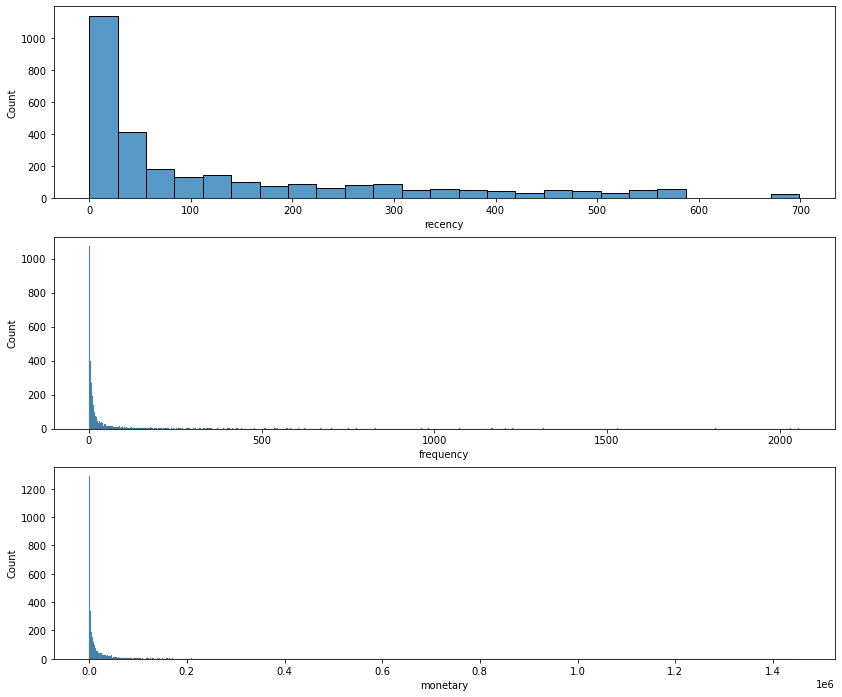

In [214]:
plt.figure(figsize=(14,12))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.histplot(rfm_seller_df['recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.histplot(rfm_seller_df['frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.histplot(rfm_seller_df['monetary'])

plt.show()

In [215]:
rfm_seller_scale = rfm_seller_df[['monetary', 'frequency', 'recency']]

scaler = StandardScaler()
scaled_rfm_df_seller = scaler.fit_transform(rfm_seller_scale)

In [216]:
kmeans = KMeans(n_clusters=4,random_state=10, max_iter=100)
kmeans.fit(scaled_rfm_df_seller)

KMeans(max_iter=100, n_clusters=4, random_state=10)

In [217]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state=10, max_iter=100)
    kmeanModel.fit(scaled_rfm_df)
    distortions.append(kmeanModel.inertia_)

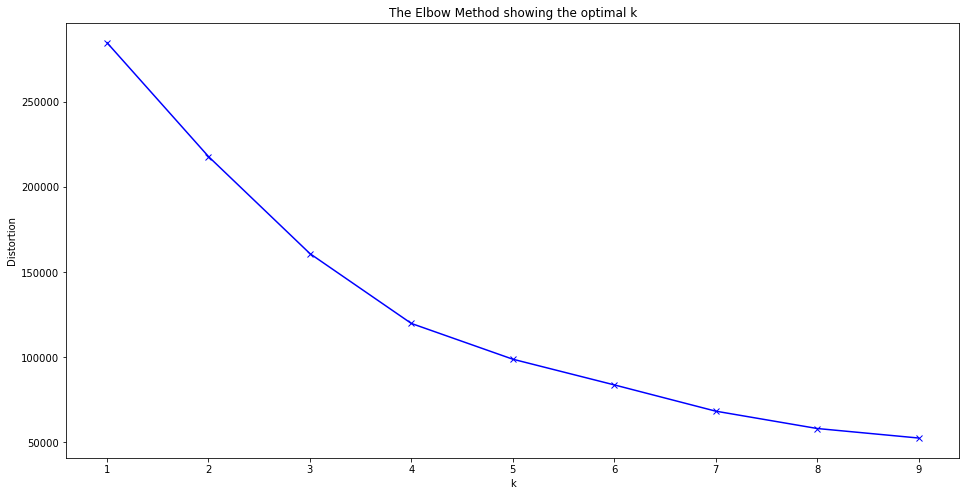

In [218]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

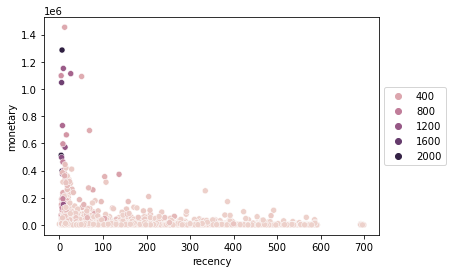

In [219]:
rfm_plot = sns.scatterplot(data=rfm_seller_df, x= 'recency',y='monetary', hue='frequency')
rfm_plot.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.show()

In [220]:
# n_clusters = 4
rfm_seller_df['label'] = kmeans.labels_

<AxesSubplot:xlabel='recency', ylabel='monetary'>

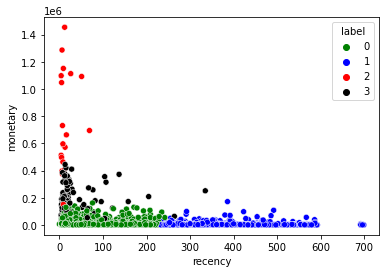

In [221]:
sns.scatterplot(data=rfm_seller_df, x= 'recency',y='monetary', hue='label', palette=['green','blue','red','black'])

In [222]:
kmeans_3 = KMeans(n_clusters=3,random_state=10, max_iter=100)
kmeans_3.fit(scaled_rfm_df_seller)

KMeans(max_iter=100, n_clusters=3, random_state=10)

In [223]:
rfm_seller_df['label_3'] = kmeans_3.labels_

<AxesSubplot:xlabel='recency', ylabel='monetary'>

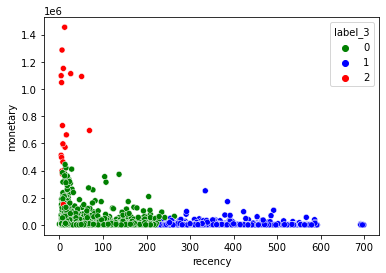

In [224]:
sns.scatterplot(data=rfm_seller_df, x= 'recency',y='monetary', hue='label_3', palette=['green','blue','red'])

In [225]:
ecommerce_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106527 entries, 0 to 118308
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       106527 non-null  object        
 1   product_id                     106527 non-null  object        
 2   seller_id                      106527 non-null  object        
 3   price                          106527 non-null  float64       
 4   freight_value                  106527 non-null  float64       
 5   customer_id                    106527 non-null  object        
 6   order_status                   106527 non-null  object        
 7   order_purchase_timestamp       106527 non-null  datetime64[ns]
 8   order_approved_at              106527 non-null  datetime64[ns]
 9   order_delivered_carrier_date   106527 non-null  datetime64[ns]
 10  order_delivered_customer_date  106527 non-null  datetime64[ns]
 11  